In [1]:
#initial imports
import numpy as np
import pandas as pd
import json
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import clear_output
import time
#SpaCy
import spacy
spacy.load('en')
from spacy.lang.en import English
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
#BeautifulSoup and NLTK
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords # Import the stop word list
from nltk import word_tokenize
from nltk.corpus import wordnet as wn
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
#plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.figure_factory as ff
from  plotly  import __version__
#plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)
#gensim
import os
import sys
import bz2
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import multiprocessing
import gensim
from gensim import corpora
from gensim import models
import pickle
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
from gensim.models import Phrases

3.1.0


2019-02-15 06:40:34,670 : INFO : 'pattern' package not found; tag filters are not available for English


In [2]:
df = pd.read_csv('~/Desktop/Final Capstone/jobs_db.csv')
pd.set_option('display.max_colwidth', -1)

In [3]:
df.head(10)

id  \
0  15   
1  16   
2  17   
3  18   
4  19   
5  20   
6  21   
7  22   
8  23   
9  24   

                                                                                                                                                                                                 title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                                                                  
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                                                                  
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                                                                
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                                                                    
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Data Scientist, Natural Language Processing (NLP), descriptive statistics, statistical modelling, machine learning</h3>   
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer, Natural Language Processing /NLP</h3>                                                                  
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing and Machine Learning Engineer</h3>                                                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Turn our df into X, for later use with modelling, train_test_split and getting a y column.

In [4]:
X = df

## EDA and Data Cleaning

Since we web scraped, the text is in pretty raw format.  To get it into useable shape, I plan to get rid of the html code before tokenizing and lemmatizing it. I'll also check for duplicates, and remove any to keep the results as clean as possible.  From here, it will be easier to determine what words can be added as stop words, or, are meaningful to the analysis in some way.

In [5]:
#Let's check for unique job descriptions. 
#If we drop some duplicates, we'll run our cleaning on less data, which is faster.
X.nunique()

id                 7882
title              3464
job_description    4334
job_class          9   
dtype: int64

In [6]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Computer Vision',
       'Text Analytics', 'Apache Spark', 'Speech Recognition',
       'Neural Networks'], dtype=object)

In [7]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Pattern Recognition            792
Text Analytics                 795
Neural Networks                827
Computer Vision                829
Natural Language Processing    881
Apache Spark                   919
Machine Learning               934
Speech Recognition             944
Text Mining                    961
Name: job_description, dtype: int64

In [8]:
#It stands to reason that we would want to keep the unique job descriptions, because titles like "Data Scientist"
#are broadly used in the field and not necessarily problematic for the scope of this project.
X = X.drop_duplicates(['job_description'], keep = 'last')

In [9]:
#Let's check to make sure we dropped what we had intended.
X.nunique()

id                 4334
title              3431
job_description    4334
job_class          9   
dtype: int64

In [10]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Computer Vision                633
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

The sum of our "female dominated fields is 1,500 which is 34.6% of our dataset. I'm going to drop rows that are Computer Vision job descriptions.  This should help even out the imbalance, and that particular field was the most "gender-balanced" out of the male-dominated job descriptions we have above.

In [11]:
#Dropping Computer Vision
X = X[X.job_class != 'Computer Vision']

In [12]:
X.reset_index(drop=True, inplace=True)

In [13]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [14]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

Although we lost a large portion of the dataset due to duplicates, it's important to prioritize quality over quantity. I evaluated the dataset to ensure that there would not be a class imbalance problem.  Now, our female-dominated fields comprise 40% of the job descriptions, this is pretty good considering we're working with scraped data. So, we'll proceed with cleaning up the dataset, so we can put it into BoW and Tf-Idf and then run some models on it!

In [15]:
#A quick view of the dataset to see what we might need to clean.
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Lots of HTML script here, as expected. Let's get some of that cleaned up before we tokenize.

In [16]:
X['job_description'] = X['job_description'].replace(r'div class="jobsearch-JobComponent-description icl-u-xs-mt--md"><div></div><div><div><div><b>', '', regex=True).replace(r'</div', '', regex=True)

In [17]:
X['title'] = X['title'].replace(r'<h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">', '', regex=True).replace(r'</h3>', '', regex=True)

In [18]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                     title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Much better, our job titles look really nice at this point. Onward!

In [19]:
X['job_description'] = X['job_description'].replace(r'<div class="jobsearch-JobComponent-description icl-u-xs-mt--md">', '', regex=True)


In [20]:
X.sample(10)

id                                                title  \
2531  6344  Sales &amp; Catering Coordinator                      
2573  6407  TDOT TECHNICIAN                                       
1760  4938  Applications Developer                                
2997  6981  Meridian Village - RN FT Nights                       
3445  7626  Algorithm Engineer                                    
2853  6779  Conversational AI Architect / Engineer                
206   412   Director, Robotics Process Automation (“RPA”), Data   
3595  7802  R&amp;D Engineer, Staff                               
3611  7819  Simulation Tools Engineer                             
2859  6786  Principal Software Engineer                           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [21]:
len(X)

3701

In [22]:
#This will get rid of most of the html markers that are within <>
def clean_html(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [23]:
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_html(X['job_description'][i])

This took under 10 seconds to run.

In [24]:
X.sample(25)

id  \
496   877    
641   1114   
791   2039   
3280  7400   
790   2035   
327   637    
1123  2932   
3693  7904   
1125  2940   
943   2242   
1078  2833   
2312  6050   
74    192    
3642  7850   
3043  7092   
400   744    
125   276    
2771  6665   
3369  7538   
2925  6896   
550   990    
2931  6902   
3381  7552   
1637  4502   
1312  3254   

                                                                          title  \
496   Assistant Professor                                                         
641   Fraud Analytics Risk Senior Manager                                         
791   Summer Research Program Intern--BS/MS Candidates                            
3280  Data Scientist                                                              
790   Applied Research Engineer                                                   
327   Data Scientist                                                              
1123  Machine Learning Data Scientist                                             
3693  R&amp;D Engineer, II                                                        
1125  Machine Learning Engineer                                                   
943   Reliability Engineer, Senior                                                
1078  Machine Learning Scientist                                                  
2312  Software Developer                                                          
74    Python Developer                                                            
3642  Data Scientist, Retention                                                   
3043  Sr Data Scientist                                                           
400   Data Scientist 2019                                                         
125   Post Doctoral Fellow                                                        
2771  11pm-7am CNA PT                                                             
3369  Research Intern - Algorithms Group                                          
2925  Account Executive III                                                       
550   Business Intelligence &amp; Insights Analyst                                
2931  Sr. Deep Learning Compiler Engineer                                         
3381  SIMULIA Aerospace &amp; Defense Initiatives Internship, May - August 2019   
1637  Data Scientist Computer Vision / Image Processing                           
1312  Data Science Summer Intern                                                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

That worked like a charm! Let's continue cleaning.

In [25]:
X['job_description'] = X['job_description'].replace(r'\n', '', regex=True)

In [26]:
X.sample(25)

id  \
3366  7535   
3068  7120   
423   781    
399   741    
2373  6117   
150   318    
358   686    
3524  7725   
1854  5449   
260   521    
1776  4994   
3514  7709   
53    150    
3345  7498   
3347  7500   
2782  6679   
186   373    
1300  3235   
3467  7650   
3696  7907   
3121  7185   
86    211    
1078  2833   
351   675    
109   252    

                                                                       title  \
3366  Data Scientist                                                           
3068  NCSC - Data Science &amp; Tagging Analyst                                
423   Data Scientist                                                           
399   Data Scientist                                                           
2373  Master Software Engineer/Tech Lead                                       
150   Siri - EPM Data Infrastructure                                           
358   Lead Research Engineer                                                   
3524  Principal Program Manager                                                
1854  Lead Specialist - IT BI Data Analyst                                     
260   Hardware / Software Researcher                                           
1776  QA Tester - Data Analytics                                               
3514  Data Scientist HR Analytics                                              
53    NLU Applied Scientist                                                    
3345  Data Scientist                                                           
3347  Vice President of Engineering                                            
2782  IT 18-0058                                                               
186   Vice President, Technology                                               
1300  Intern - Office of the CTO - Vx:RAIL Machine Learning Project            
3467  RESEARCH FELLOW - Primary Cilia in Neural and Craniofacial Development   
3696  Data Scientist – AI Machine Learning – Investment Management             
3121  Senior Applied Scientist                                                 
86    Experienced Quantitative Portfolio Manager or Strategist 1H2017          
1078  Machine Learning Scientist                                               
351   Data Scientist                                                           
109   Visiting Scientist (AI)                                                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [27]:
X['job_description'] = X['job_description'].replace(r'&amp;', '', regex=True)

In [28]:
X.sample(25)

id                                                       title  \
1542  3555  Information Technology Administrator                         
3320  7466  Scientist/Engineer Image Processing Algorithm Developer      
2223  5934  Software Engineer, Data                                      
1808  5183  DATA ENGINEERS X4 7/3/2018                                   
1804  5169  Data Engineer - Solutions                                    
1603  4462  Data Scientist /Engineer                                     
1342  3298  Cognitive Software Developer Intern May 2019 12-16 months    
2146  5840  Data Scientist, Senior                                       
1628  4490  Data Scientist - Customer Experience                         
411   760   Data Scientist - Master's Entry Level Consultant - Atlanta   
3414  7591  Temporary Research Technician                                
3447  7628  Data Scientist, Junior                                       
2736  6621  Medical Transcriptionist II (Clackamas)                      
3642  7850  Data Scientist, Retention                                    
1495  3502  Data Scientist/Machine Learning Trainee                      
2774  6668  Chef De Cuisine                                              
402   747   Contract - Tech Professional Data Analytics                  
777   2017  Signal Processing Engineer                                   
2993  6976  Principal Machine Learning Scientist, Amazon Alexa           
280   550   Scientific Information Analyst                               
3479  7665  Senior Research Analyst, IRDS &amp; IE                       
2876  6828  Senior Software Development Manager - Alexa AI               
2260  5988  Software Cloud Architect                                     
1813  5197  Full Stack Software Engineer (LAMP)                          
845   2114  Research Staff Member                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [29]:
X['job_description'] = X['job_description'].replace(r'>', '', regex=True)

In [30]:
X.sample(25)

id  \
790   2035   
309   606    
1575  4423   
1872  5477   
2302  6038   
3390  7564   
1106  2896   
3300  7441   
2417  6192   
1082  2839   
1947  5578   
2919  6890   
94    226    
3636  7844   
3224  7308   
506   890    
818   2080   
3552  7756   
2485  6288   
2173  5868   
3235  7319   
1320  3269   
1209  3103   
1357  3320   
2830  6750   

                                                                   title  \
790   Applied Research Engineer                                            
309   Research Scientist                                                   
1575  Consumer Insights Manager - Analytics                                
1872  Senior Data Engineer                                                 
2302  Senior Software Engineer, Audience Platform                          
3390  Research Intern - Systems &amp; Conversational AI                    
1106  Machine Learning Research Engineer                                   
3300  Robotics Perception Engineer                                         
2417  Customer Service Administrator Repairs                               
1082  Machine Learning Engineer                                            
1947  Distinguished Data Engineer                                          
2919  Fish Cutter                                                          
94    NLP Software Engineer                                                
3636  Expert/Senior Researcher - Machine Learning for Autonomous Driving   
3224  Solution Architect Big Data                                          
506   Potential Software Engineer                                          
818   Java Developers                                                      
3552  Data Scientist                                                       
2485  Software Engineer I - Speech Recognition and Search Product          
2173  Staff Software Engineer (Big Data)                                   
3235  Intern, Data Science - Part-Time                                     
1320  Developer, Machine Learning - Financial Services Lab                 
1209  Machine Learning Engineer                                            
1357  DATA ANALYST INTERN                                                  
2830  Deep Learning Applied Scientist - AI Applications                    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

The last regex left quite a bit of whitespace, which isn't useful. Let's strip that before moving on.

In [31]:
X['job_description'] = X['job_description'].str.strip()

In [32]:
X.sample(25)

id  \
687   1880   
1284  3214   
979   2292   
2051  5721   
2180  5876   
110   254    
343   665    
1231  3134   
2991  6973   
3025  7050   
154   324    
172   351    
1398  3384   
2692  6571   
1210  3104   
493   873    
312   616    
1024  2706   
1338  3293   
348   670    
2401  6163   
2323  6063   
3574  7781   
337   653    
753   1980   

                                                                    title  \
687   EEG Pruner                                                            
1284  Machine Learning Scientist – Algorithm Development                    
979   Cognitive Software Engineer/Principal Cognitive Software Engineer     
2051  Sales Engineer - US West                                              
2180  Senior Data Engineer                                                  
110   Mapping Engineer                                                      
343   Staff Data Scientist - Search / NLP                                   
1231  BI &amp; Analytics Intern                                             
2991  Civil Engineering Technician II                                       
3025  RN - Full-time Evening/Night 12 hr Shifts - $10,000 Sign-On Bonus     
154   Research Scientist (NLP, IR, Complex Networks, Recommender Systems)   
172   Business Analyst - Entry-Level - Strategy and Business Development    
1398  Scientific Information Officer                                        
2692  LT Steak &amp; Seafood Busser - AM Shift                              
1210  Quantitative Business Analyst, gTech                                  
493   Sr. IT Analyst, Data Science                                          
312   Consultant - Intelligent Process Automation                           
1024  Machine Learning Modeler                                              
1338  Machine Learning Engineer                                             
348   NLP Engineer                                                          
2401  Dispatcher                                                            
2323  Machine Learning Scientist Engineer                                   
3574  Data Scientist                                                        
337   Senior Data Scientist                                                 
753   Postdoctoral Fellowship: Bioprocess Analytics                         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [33]:
#We don't need the ids that populated in the SQLite Database
X = X.drop(['id'], axis=1)

In [34]:
X.head(10)

title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [35]:
#Let's remove punctuation.
def punctuation_remover(row):
    punctuation = '!"#$&\'()*+,-./:;<=>?@[\\]^_`{|}~«»'  
    
    punctuationNoPeriod = "[" + re.sub("\.","", punctuation) + "]"
    row = re.sub(punctuationNoPeriod, " ", str(row))
    #to remove double white spaces and create space after %,
    row = row.replace('  ', ' ')
    row = row.replace('%', '% ')
    return row.strip()

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<ipython-input-35-b2830c59b60e>:5: DeprecationWarning:

invalid escape sequence \.



In [36]:
# remove punctuation from the job titles first
X['title'] = X['title'].apply(punctuation_remover)

In [37]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [38]:
#Since that worked well, let's now remove punctuation from the job descriptions.
X['job_description'] = X['job_description'].apply(punctuation_remover)

In [39]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [40]:
X['gender_breakdown'] = X['job_class']

In [41]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [42]:
X.loc[X['gender_breakdown'] == 'Natural Language Processing', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Mining', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Analytics', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Speech Recognition', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Pattern Recognition', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Machine Learning', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Apache Spark', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Neural Networks', 'gender_breakdown'] = 0

In [43]:
X.sample(5)

title  \
3449  Data Scientist Growth         
631   Fraud Senior Data Scientist   
2639  ML Scientist                  
153   Research Scientist            
777   Signal Processing Engineer    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   job_description  \
3449  Udacity s mission is to democratize education We re an online learning platform offering groundbreaking education in fields such as artificial intelligence machine learning robotics virtual reality and more Focused on self empowerment through learning Udacity is making innovative technologies such as self driving cars available to a global community of aspiring technologists while also enabling learners at all levels to skill up with essentials like programming web and app development If you love a challenge and truly want to make a difference in the world read on Udacity is looking for a Data Scientist who will work on the Marketing data platform You would be the first data scientist who would work on different predictive models such as LTV Conversion rate and Payback etc  to power Marketing decisions at scale The models would be applied with Growth Product to power Personalization and Recommendation engine Responsibilities         Develop custom marketing predictive models and algorithms to apply to data sets Use predictive modeling to increase and optimize growth product experience ad targeting and other business outcomes Contribute to the Marketin

## Unsupervised Approach

I'll use the Latend Dirichlet Allocation method first, and then use it with bigrams and trigrams. I will evalute for coherence, and tune the models.

In [44]:
#First step, tokenizer.
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [45]:
nltk.download('wordnet')
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tiffanyfrench/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
#nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
stopwords = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system']))

In [47]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [48]:
import random
text_data = []
for text in X:
    for i in range(len(X)):
        tokens = prepare_text_for_lda(X['job_description'][i])
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['system', 'managernew', 'nyare', 'problem', 'solver', 'starter', 'enjoy', 'understanding', 'implement', 'desktop', 'server', 'cloud', 'technology', 'infrastructure', 'security', 'application', 'enjoy', 'research', 'resolving', 'complex', 'relate', 'issue', 'extend', 'expertise', 'cloud', 'technology', 'science', 'people', 'person', 'enjoy', 'helping', 'user', 'member', 'solve', 'problem', 'share', 'passion', 'enable', 'positive', 'change', 'within', 'healthcare', 'helping', 'patient', 'chronic', 'conditions', 'diabetes', 'could', 'perfect', 'mind', 'professional', 'share', 'common', 'mission', 'passion', 'helping', 'others', 'desire', 'build', 'great', 'company', 'cecelia', 'health', 'growth', 'venture', 'back', 'health', 'services', 'company', 'base', 'partner', 'pharmaceutical', 'device', 'company', 'payer', 'deliver', 'personalize', 'technology', 'base', 'coaching', 'improve', 'treatment', 'adherence', 'health', 'outcome', 'people', 'living', 'diabetes', 'chronic', 'conditions', 'c

['descriptionjob', 'title', 'assistant', 'professorjob', 'category', 'faculty', 'providerdepartment', 'developmental', 'cancer', 'biology', 'computational', 'biologylocation', '5566work', 'descriptionoregon', 'health', 'science', 'university', 'locate', 'portland', 'oregon', 'whose', 'breathtaking', 'scenery', 'excite', 'location', 'weather', 'friendly', 'people', 'contribute', 'appearance', 'numerous', 'list', 'include', 'online', 'insider', 'least', 'expensive', 'city', 'money', 'magazine', 'place', 'vacation', 'place', 'american', 'style', 'magazine', 'destination', 'rank', 'nation\x92s', 'biomedical', 'institution', 'patient', 'research', 'education', 'annual', 'operate', 'budget', 'billion', 'million', 'annual', 'grant', 'funding', 'student', 'trainee', 'nearly', 'million', 'patient', 'visit', 'multiple', 'department', 'among', 'annual', 'grant', 'nation\x92s', 'fast', 'growing', 'biomedical', 'institution', 'bolster', 'resource', 'commitment', 'billion', 'penny', 'knight', '\x93c

['apply', 'position', 'application', 'automatically', 'submit', 'following', 'location', 'chicago', 'usaminimum', 'qualification', 'degree', 'technical', 'engineering', 'field', 'equivalent', 'practical', 'experience', 'years', 'relevant', 'experience', 'experience', 'following', 'machine', 'learning', 'recommendation', 'system', 'natural', 'language', 'processing', 'computer', 'vision', 'pattern', 'recognition', 'artificial', 'intelligence', 'experience', 'programming', 'language', 'include', 'limited', 'python', 'prefer', 'qualification', 'master', 'degree', 'computer', 'science', 'relate', 'technical', 'field', 'equivalent', 'practical', 'experience', 'experience', 'statistical', 'programming', 'language', 'python', 'apply', 'machine', 'learning', 'technique', 'dimensionality', 'reduction', 'strategy', 'classification', 'natural', 'language', 'processing', 'framework', 'experience', 'designing', 'deploy', 'using', 'following', 'technology', 'tensor', 'spark', 'torch', 'caffe', 'syst

['foursquare', 'since', 'inception', 'foursquare', 'leading', 'force', 'change', 'location', 'information', 'enrich', 'world', 'digital', 'life', 'location', 'intelligence', 'company', 'foursquare', 'comprise', 'know', 'consumer', 'foursquare', 'swarm', 'thrive', 'medium', 'enterprise', 'product', 'offering', 'include', 'place', 'developer', 'pinpoint', 'attribution', 'marketer', 'place', 'insight', 'analyst', 'base', 'world', 'large', 'traffic', 'panel', 'people', 'across', 'office', 'francisco', 'sales', 'office', 'around', 'globe', 'dedicate', 'trailblazing', 'mission', 'enrich', 'consumer', 'experience', 'informing', 'business', 'decision', 'location', 'intelligence', 'engineering', 'member', 'foursquare', 'engineering', 'bring', 'experience', 'building', 'product', 'ground', 'passionate', 'tackle', 'tough', 'challenge', 'location', 'space', 'others', 'solve', 'problem', 'comfortable', 'running', 'idea', 'eager', 'learn', 'skill', 'bleeding', 'platform', 'variety', 'tool', 'technol

['jobwhat', 'goldman', 'sachs', 'engineer', 'things', 'things', 'possible', 'change', 'world', 'connect', 'people', 'capital', 'idea', 'solve', 'challenge', 'pressing', 'engineering', 'problem', 'client', 'engineering', 'team', 'build', 'massively', 'scalable', 'software', 'system', 'architect', 'latency', 'infrastructure', 'solution', 'proactively', 'guard', 'cyber', 'threat', 'leverage', 'machine', 'learning', 'alongside', 'financial', 'engineering', 'continuously', 'action', 'create', 'business', 'transform', 'finance', 'explore', 'world', 'opportunity', 'speed', 'market', 'engineering', 'comprise', 'technology', 'division', 'global', 'strategist', 'group', 'critical', 'center', 'business', 'dynamic', 'environment', 'require', 'innovative', 'strategic', 'thinking', 'immediate', 'solution', 'limit', 'digital', 'possibility', 'start', 'forgoldman', 'sachs', 'engineer', 'innovator', 'problem', 'solver', 'building', 'solution', 'management', 'mobile', 'creative', 'collaborator', 'evolve

['astrazeneca', 'global', 'innovation', 'drive', 'biopharmaceutical', 'business', 'focus', 'discovery', 'development', 'commercialization', 'prescription', 'medicine', 'world', 'serious', 'disease', 'world', 'leading', 'pharmaceutical', 'company', 'astrazeneca', 'proud', 'unique', 'workplace', 'culture', 'inspire', 'innovation', 'collaboration', 'employee', 'empower', 'express', 'diverse', 'perspective', 'value', 'energize', 'reward', 'idea', 'creativity', 'department', 'analytics', 'seuitscience', 'enable', 'unit', 'global', 'capability', 'supporting', 'research', 'development', 'product', 'portfolio', 'strategy', 'medical', 'affairs', 'finance', 'compliance', 'legal', 'global', 'business', 'services', 'organize', 'around', 'capability', 'area', 'business', 'partner', 'solution', 'delivery', 'architecture', 'application', 'support', 'analytics', 'change', 'operations', 'operate', 'site', 'across', 'sweden', 'india', 'mexico', 'analytics', 'provide', 'analytics', 'insight', 'services',

['description', 'description', 'seeking', 'staff', 'level', 'management', 'engineer', 'become', 'member', 'digital', 'modeling', 'simulation', 'qualify', 'candidate', 'responsible', 'supporting', 'integration', 'verification', 'large', 'scale', 'storage', 'environment', 'support', 'missile', 'defense', 'agency', 'digital', 'modeling', 'simulation', 'program', 'include', 'working', 'following', 'technology', 'pipeline', 'services', 'operational', 'store', 'warehouse', 'mart', 'store', 'mining', 'visualization', 'experiment', 'design', 'right', 'individual', 'display', 'passion', 'science', 'leading', 'cultural', 'change', 'throughout', 'organization', 'regard', 'effort', 'role', 'responsibility', 'candidate', 'support', 'collection', 'planning', 'quality', 'verification', 'quality', 'reporting', 'cloud', 'base', 'simulation', 'environment', 'plan', 'increase', 'monthly', 'volume', 'thousand', 'simulation', 'produce', 'hundred', 'terabyte', 'perform', 'duty', 'associate', 'provide', 'apa

['basic', 'qualificationsbachelor', 'degree', 'computer', 'science', 'equivalent', 'previous', 'experience', 'software', 'engineer', 'least', 'years', 'experience', 'manage', 'software', 'development', 'team', 'include', 'manage', 'complete', 'software', 'development', 'cycle', 'large', 'scale', 'product', 'services', 'within', 'agile', 'scrum', 'environment', 'experience', 'conducting', 'scoping', 'technical', 'requirement', 'prioritize', 'program', 'deliverable', 'experience', 'release', 'software', 'across', 'multiple', 'software', 'team', 'strong', 'write', 'verbal', 'communication', 'skillsalexa', 'artificial', 'intelligence', 'looking', 'software', 'development', 'manager', 'alexa', 'voice', 'activate', 'digital', 'assistant', 'power', 'devices', 'amazon', 'accountable', 'alexa', 'speech', 'platform', 'automatic', 'speech', 'recognition', 'natural', 'language', 'understanding', 'personalization', 'system', 'conversational', 'understanding', 'knowledge', 'graph', 'speech', 'engine

['global', 'security', 'scientistjob', 'description', 'position', 'raytheon', 'global', 'security', 'services', 'counterintelligence', 'investigation', 'organization', 'charge', 'provide', 'proactive', 'actionable', 'threat', 'intelligence', 'trend', 'identification', 'analysis', 'report', 'writing', 'concern', 'counterintelligence', 'place', 'incident', 'terrorism', 'espionage', 'global', 'security', 'discipline', 'global', 'security', 'scientist', 'member', 'deliver', 'scientific', 'methodology', 'hypothesis', 'testing', 'strategic', 'predictive', 'analytics', 'business', 'leaders', 'identify', 'convey', 'visualize', 'insider', 'threat', 'threat', 'management', 'event', 'business', 'require', 'working', 'various', 'security', 'cyber', 'analyst', 'expand', 'maintain', 'framework', 'overall', 'insider', 'threat', 'intelligence', 'program', 'responsibility', 'include', 'limited', 'identify', 'monitoring', 'analyze', 'evaluate', 'information', 'multiple', 'source', 'include', 'company', 

['thorn', 'profit', 'focus', 'building', 'technology', 'defend', 'child', 'sexual', 'abuse', 'working', 'thorn', 'give', 'opportunity', 'apply', 'skill', 'expertise', 'passion', 'directly', 'impact', 'life', 'vulnerable', 'abuse', 'child', 'staff', 'solve', 'dynamic', 'quickly', 'evolve', 'problem', 'network', 'partner', 'company', 'enforcement', 'agency', 'bring', 'clarity', 'complexity', 'lightness', 'heavy', 'problem', 'could', 'great', 'scientist', 'uncover', 'valuable', 'insight', 'add', 'intelligence', 'exist', 'future', 'product', 'combination', 'finding', 'quick', 'developing', 'longer', 'research', 'collaborate', 'closely', 'engineering', 'product', 'identify', 'insight', 'model', 'valuable', 'research', 'implement', 'responsible', 'acquiring', 'craft', 'performing', 'analytical', 'experiment', 'discipline', 'manner', 'evaluate', 'iterate', 'result', 'discuss', 'result', 'conclude', 'model', 'insight', 'ready', 'ship', 'partner', 'member', 'engineering', 'simplify', 'architect

['markmonitor', 'world', 'leader', 'brand', 'protection', 'safeguard', 'revenue', 'reputation', 'fortune', 'brand', 'rapidly', 'evolve', 'digital', 'world', 'using', 'delivery', 'model', 'advance', 'technology', 'domain', 'expertise', 'markmonitor', 'address', 'domain', 'brand', 'piracy', 'fraud', 'risk', 'brand', 'anonymity', 'global', 'reach', 'shifting', 'consumption', 'pattern', 'digital', 'content', 'physical', 'good', 'services', 'position', 'candidate', 'comfortable', 'working', 'agile', 'environment', 'attitude', 'cross', 'functional', 'environment', 'minimal', 'supervision', 'mentor', 'others', 'ideal', 'candidate', 'starter', 'quick', 'learner', 'great', 'player', 'candidate', 'responsible', 'review', 'requirement', 'design', 'implementation', 'testing', 'ability', 'evaluate', 'analyze', 'resolve', 'complex', 'technical', 'problem', 'backend', 'harvester', 'developing', 'software', 'solution', 'brand', 'protection', 'business', 'enjoy', 'solving', 'complex', 'problem', 'healt

['temporaryoverview', 'responsibilitiesperforms', 'electroneurodiagnostic', 'test', 'within', 'approve', 'standard', 'utilize', 'knowledge', 'neuroanatomy', 'physiology', 'basic', 'electronics', 'electrical', 'safety', 'general', 'knowledge', 'electroneurodiagnostic', 'instrumentation', 'pattern', 'recognition', 'various', 'medical', 'pharmacological', 'conditions', 'incumbent', 'overtime', 'require', 'report', 'director', 'pulmonary', 'services', 'perform', 'duty', 'assign', 'qualificationsexperience', 'description', 'previous', 'experience', 'provide', 'neurodiagnostic', 'exam', 'experience', 'minimum', 'require', 'month', 'provide', 'neurodiagnostic', 'exam', 'hospital', 'physician', 'office', 'experience', 'prefer', 'desire', 'month', 'provide', 'neurodiagnostic', 'exam', 'hospital', 'physician', 'office', 'education', 'description', 'education', 'minimum', 'require', 'skill', 'communicating', 'clearly', 'effectively', 'using', 'standard', 'english', 'write', 'verbal', 'format', 'a

['healthcare', 'economics', 'specialistrequisition', '177545location', 'johns', 'hopkins', 'health', 'burnie', 'mdcategory', 'clinical', 'professionalwork', 'shift', 'shiftwork', 'hours', 'weekend', 'require', 'nodate', 'post', '2019johns', 'hopkins', 'health', 'system', 'employ', 'people', 'annually', 'joining', 'johns', 'hopkins', 'health', 'system', 'become', 'diverse', 'organization', 'dedicate', 'patient', 'family', 'community', 'serve', 'employee', 'career', 'opportunity', 'available', 'academic', 'community', 'hospital', 'setting', 'services', 'physician', 'practice', 'international', 'affiliate', 'location', 'health', 'insurance', 'industry', 'share', 'vision', 'mission', 'values', 'exceptional', 'customer', 'service', 'technical', 'skill', 'invite', 'leaders', 'innovator', 'healthcare', 'field', 'healthcare', 'economics', 'specialist', 'responsible', 'creation', 'development', 'communication', 'healthcare', 'economics', 'analysis', 'mining', 'pattern', 'recognition', 'capabili

['janssen', 'research', 'development', 'division', 'johnson', 'johnson', 'currently', 'recruit', 'senior', 'director', 'janssen', 'science', 'tool', 'janssen', 'pharmaceutical', 'company', 'johnson', 'johnson', 'matter', 'helping', 'people', 'healthy', 'life', 'focus', 'treat', 'curing', 'prevent', 'devastate', 'complex', 'disease', 'pursue', 'promise', 'science', 'wherever', 'might', 'found', 'janssen', 'mission', 'drive', 'patient', 'inspire', 'collaborate', 'world', 'health', 'everyone', 'janssen', 'organization', 'people', 'operate', 'budget', 'include', 'therapeutic', 'area', 'cardiovascular', 'metabolism', 'immunology', 'infectious', 'disease', 'vaccine', 'neuroscience', 'oncology', 'pulmonary', 'hypertension', 'global', 'function', 'addition', 'senior', 'director', 'strategy', 'operations', 'partner', 'evaluate', 'current', 'strategy', 'shape', 'future', 'strategy', 'align', 'execution', 'implementation', 'thrive', 'diverse', 'company', 'culture', 'celebrate', 'uniqueness', 'emp

['usvideoamp', 'mission', 'bridge', 'television', 'digital', 'advertising', 'campaign', 'measurement', 'planning', 'audience', 'target', 'solution', 'dramatically', 'improve', 'performance', 'efficiency', 'advertising', 'investment', 'engineer', 'scientist', 'designer', 'medium', 'strategist', 'inspire', 'tackle', 'challenge', 'problem', 'medium', 'marketing', 'bridge', 'divide', 'digital', 'medium', 'responsibilitiesas', 'member', 'science', 'fundamental', 'force', 'shaping', 'company', 'strategy', 'innovate', 'digital', 'linear', 'television', 'advertising', 'market', 'outsized', 'impact', 'tool', 'building', 'forecasting', 'planning', 'allocation', 'audience', 'behavior', 'prediction', 'technology', 'usepython', 'julia', 'hadoop', 'apache', 'spark', 'require', 'skillsphd', 'science', 'physics', 'mathematics', 'scientific', 'fieldexperience', 'building', 'model', 'manage', 'pipeline', 'tool', 'python', 'julia', 'apache', 'sparksql', 'fluency', 'understanding', 'relational', 'model', 

['shape', 'future', 'enterprise', 'software', 'technology', 'apply', 'internet', 'scale', 'technology', 'challenge', 'facing', 'enterprise', 'business', 'think', 'driving', 'connect', 'always', 'thinking', 'autonomous', 'mission', 'enable', 'company', 'looking', 'expert', 'senior', 'scientist', 'base', 'mountain', 'headquarters', 'working', 'challenge', 'science', 'application', 'using', 'machine', 'learning', 'solve', 'complex', 'business', 'problem', 'responsibilitiestransform', 'business', 'problem', 'problem', 'research', 'build', 'statistical', 'machine', 'learning', 'model', 'perform', 'exploratory', 'analysis', 'statistical', 'analysis', 'clearly', 'present', 'result', 'analysis', 'customer', 'management', 'collaborate', 'member', 'build', 'science', 'product', 'services', 'using', 'platform', 'youmaster', 'degree', 'computer', 'science', 'mathematics', 'statistics', 'relate', 'quantitative', 'field', 'focus', 'machine', 'learning', 'learning', 'prefer', 'years', 'professional',

['medical', 'transcriptionist', 'evening', 'training', 'waterville', 'required40', 'weekmedical', 'transcription149', 'north', 'streetwaterville', 'maine', '04901united', 'statesmainegeneral', 'health', 'leading', 'health', 'organization', 'maine', 'offering', 'excite', 'opportunity', 'experience', 'medical', 'transcriptionist', 'dedicate', 'professional', 'evening', 'opportunity', 'training', 'require', 'waterville', 'maine', 'maine', 'state', 'residency', 'require', 'position', 'highlight', 'extremely', 'competitive', 'wages', 'base', 'productivitydifferential', 'weekend', 'holiday', 'workedcompetitive', 'benefit', 'package', 'include', 'health', 'dental', 'disability', 'optionsgenerous', 'earn', 'programretirement', 'plan', 'employer', 'matchresponsibilitiestranscribes', 'dictate', 'report', 'healthcare', 'provider', 'inclusion', 'medical', 'record', 'transcribe', 'dictate', 'report', 'appropriate', 'format', 'accord', 'establish', 'standard', 'style', 'punctuation', 'grammar', 'fla

['computer', 'science', 'equivalent', 'years', 'industry', 'experience', 'programming', 'experience', 'linux', 'windows', 'environment', 'experience', 'building', 'scalable', 'infrastructure', 'software', 'distribute', 'system', 'commercial', 'online', 'services', 'alexa', 'learning', 'platform', 'hire', 'building', 'distribute', 'secure', 'accelerate', 'learning', 'stack', 'speech', 'recognition', 'underlie', 'massively', 'parallel', 'computing', 'platform', 'behind', 'alexa', 'senior', 'software', 'development', 'engineer', 'strong', 'sense', 'ownership', 'quality', 'support', 'research', 'scientist', 'excite', 'technology', 'space', 'technical', 'leader', 'design', 'implement', 'critical', 'component', 'define', 'architectural', 'vision', 'collaborate', 'partner', 'team', 'across', 'organization', 'mentor', 'develop', 'junior', 'engineer']
['hourpart', 'timedietary', 'skilled', 'nursing', 'facility', 'hourlylocation', 'venice', 'local', 'candidate', 'shift', 'shift', 'need', 'opport

['temporaryvisiting', 'instructor', 'position', 'weill', 'cornell', 'graduate', 'school', '2019job', 'descriptionthe', 'weill', 'cornell', 'graduate', 'school', 'medical', 'science', 'seek', 'individual', 'teach', 'semester', 'machine', 'learning', 'course', 'machine', 'learning', 'biology', 'semester', 'course', 'course', 'student', 'computational', 'biology', 'master', 'degree', 'program', 'teach', 'essential', 'machine', 'learning', 'technique', 'application', 'biological', 'system', 'topic', 'include', 'classification', 'regression', 'clustering', 'neural', 'network', 'dimensionality', 'reduction', 'support', 'vector', 'machine', 'responsibility', 'includeproviding', 'weekly', 'lecturesassigning', 'grading', 'homeworkdeveloping', 'grading', 'final', 'examrequired', 'qualificationscandidates', 'computer', 'science', 'mathematics', 'statistics', 'closely', 'relate', 'field', 'teaching', 'experience', 'graduate', 'level', 'salary', 'commensurate', 'experience', 'qualification', 'appli

['jacobs', 'engineering', 'technology', 'science', 'contract', 'provide', 'product', 'technical', 'services', 'relate', 'human', 'operations', 'space', 'development', 'integration', 'broad', 'spectrum', 'engineering', 'requirement', 'include', 'human', 'spacecraft', 'flight', 'flight', 'development', 'product', 'human', 'exploration', 'mission', 'planning', 'institution', 'support', 'services', 'technology', 'development', 'looking', 'image', 'scientist', 'image', 'scientist', 'support', 'science', 'directorate', 'johnson', 'space', 'center', 'field', 'earth', 'planetary', 'science', 'image', 'scientist', 'implement', 'image', 'earth', 'science', 'science', 'solution', 'classification', 'taxonomy', 'content', 'base', 'image', 'retrieval', 'mining', 'increase', 'efficiency', 'management', 'value', 'accessibility', 'imagery', 'database', 'georeference', 'imagery', 'analyze', 'astronaut', 'photography', 'earth', 'provide', 'proposal', 'support', 'funding', 'opportunity', 'develop', 'resea

['contractjob', 'descriptiontitle', 'scientist', 'forecasting', 'location', 'redmond', 'wanature', 'employment', 'permanent', 'contract', 'fineresponsibilities', 'apply', 'statistical', 'machine', 'learning', 'knowledge', 'specific', 'business', 'problem', 'supporting', 'decision', 'making', 'provide', 'requirement', 'develop', 'analytic', 'capability', 'platform', 'pipeline', 'metrics', 'using', 'analyze', 'trend', 'cause', 'forecast', 'inaccuracy', 'improve', 'exist', 'methodology', 'deploy', 'source', 'testing', 'model', 'enhancement', 'tuning', 'model', 'parameter', 'build', 'decision', 'making', 'model', 'propose', 'solution', 'business', 'problem', 'require', 'qualification', 'years', 'experience', 'science', 'experience', 'demand', 'planning', 'forecasting', 'series', 'experience', 'statistical', 'methodology', 'segmentation', 'multivariate', 'analysis', 'discrete', 'choice', 'modeling', 'experimental', 'design', 'solid', 'foundation', 'statistical', 'modeling', 'machine', 'lear

['immuno', 'oncology', 'scientistthe', 'oncology', 'research', 'therapeutic', 'seek', 'experience', 'computational', 'biologist', 'scientist', 'fight', 'cancer', 'excite', 'scientist', 'integrate', 'discovery', 'team', 'design', 'experiment', 'manage', 'advance', 'statistical', 'machine', 'learning', 'computational', 'technique', 'discover', 'target', 'either', 'growth', 'cancer', 'awaken', 'immune', 'system', 'eradicate', 'cancer', 'furthermore', 'scientist', 'collaborate', 'early', 'development', 'team', 'guide', 'development', 'molecule', 'target', 'drive', 'biomarker', 'plan', 'summary', 'responsibility', 'proactively', 'engage', 'project', 'team', 'define', 'crisp', 'scientific', 'question', 'address', 'appropriately', 'power', 'experimental', 'designssupply', 'computational', 'statistical', 'machine', 'learning', 'modeling', 'capability', 'need', 'synthesize', 'design', 'actionable', 'recommendation', 'relative', 'questionin', 'collaboration', 'project', 'team', 'propose', 'analy

['electronic', 'systemsst', 'petersburg', 'floridasenior', 'staff', 'engineer', 'algorithm', 'developmentsaving', 'life', 'making', 'world', 'safe', 'place', 'liveelectronic', 'system', 'headquarter', 'arlington', 'texas', 'provide', 'broad', 'range', 'component', 'product', 'subsystem', 'system', 'relate', 'services', 'military', 'commercial', 'customer', 'search', 'senior', 'staff', 'engineer', 'algorithm', 'development', 'electronic', 'system', 'segment', 'provide', 'broad', 'range', 'aerospace', 'system', 'security', 'detection', 'system', 'pilot', 'training', 'company', 'innovator', 'changer', 'entrepreneur', 'prime', 'contractor', 'provide', 'broad', 'range', 'communication', 'electronic', 'sensor', 'system', 'military', 'commercial', 'platform', 'across', 'globe', 'embrace', 'innovative', 'progressive', 'idea', 'advance', 'product', 'military', 'commercial', 'customer', 'values', 'integral', 'candidate', 'share', 'values', 'integrityexcellenceaccountabilityrespectjob', 'overview

['looking', 'someone', 'passionate', 'pushing', 'forefront', 'touch', 'technology', 'working', 'alongside', 'innovative', 'energetic', 'ready', 'pace', 'environment', 'responsibilitiesimplement', 'algorithm', 'touch', 'controllersdevelop', 'debug', 'firmware', 'hardware', 'base', 'embed', 'using', 'cgenerate', 'test', 'assist', 'build', 'automationparticipate', 'design', 'review', 'engineersability', 'speed', 'quickly', 'unfamiliar', 'codeideal', 'background0', 'years', 'experienceeducationbachelor', 'degree', 'higher', 'computer', 'science', 'equivalentminimum', 'qualificationsknowledge', 'machine', 'learning', 'techniquesknowledge', 'statistical', 'signal', 'processing', 'techniquesproficient', 'programmingknowledge', 'python', 'matlabpreferred', 'qualificationsknowledge', 'visual', 'experience', 'embed', 'systemsfamiliar', 'source', 'controlwriting', 'documentation', 'design', 'workjob', 'timeexperience', 'machine', 'learning', 'prefer', 'education', 'bachelor', 'require', 'authoriz

['search', 'machine', 'learning', 'engineerthe', 'challengemachine', 'learning', 'critical', 'adobe', 'cloud', 'offering', 'adobe', 'cloud', 'enable', 'customer', 'create', 'manage', 'digital', 'content', 'assets', 'composite', 'document', 'digital', 'experience', 'transformation', 'creative', 'cloud', 'creative', 'professional', 'novice', 'user', 'alike', 'manage', 'lifecycle', 'digital', 'assets', 'library', 'variety', 'creative', 'content', 'document', 'every', 'brush', 'colors', 'image', 'video', 'beyond', 'experience', 'cloud', 'optimize', 'digital', 'experience', 'digital', 'transformation', 'enterprise', 'digital', 'content', 'rule', 'mobile', 'playing', 'pivotal', 'whereas', 'document', 'cloud', 'paperless', 'world', 'offering', 'provide', 'author', 'seamless', 'transfer', 'content', 'across', 'user', 'entity', 'adobe', 'cloud', 'provide', 'stock', 'image', 'marketplace', 'adobe', 'stock', 'community', 'behance', 'entail', 'machine', 'learning', 'embed', 'enable', 'content', 'q

['lifetime', 'healthcare', 'company', 'attract', 'talent', 'diverse', 'socioeconomic', 'cultural', 'experiential', 'background', 'diversify', 'workforce', 'reflect', 'community', 'serve', 'mission', 'foster', 'environment', 'diversity', 'inclusion', 'explicitly', 'recognize', 'fundamental', 'parts', 'organizational', 'culture', 'believe', 'diversity', 'thought', 'background', 'drive', 'innovation', 'enable', 'provide', 'leading', 'healthcare', 'insurance', 'services', 'mission', 'recruit', 'candidate', 'community', 'diversify', 'strengthen', 'workforce', 'company', 'culture', 'employee', 'unite', 'lifetime', 'values', 'behavior', 'include', 'compassion', 'pride', 'excellence', 'innovation', 'employer', 'choice', 'value', 'workforce', 'diversity', 'innovative', 'thinking', 'employee', 'development', 'offering', 'competitive', 'compensation', 'benefit', 'summarydata', 'scientist', 'responsible', 'modeling', 'complex', 'business', 'problem', 'discover', 'business', 'insight', 'finding', '

['analytical', 'drive', 'professional', 'interest', 'leading', 'analytics', 'offer', 'opportunity', 'provide', 'front', 'support', 'solve', 'clients’', 'challenge', 'problem', 'forensic', 'analytics', 'practice', 'within', 'deloitte', 'transactions', 'business', 'analytics', 'place', 'forensic', 'analytics', 'growth', 'practice', 'within', 'deloitte', 'financial', 'advisory', 'center', 'around', 'several', 'hot', 'area', 'business', 'today', 'analytics', 'forensic', 'analysis', 'litigation', 'support', 'specialize', 'skill', 'career', 'area', 'fascinate', 'demand', 'analytics', 'make', 'extensive', 'statistical', 'quantitative', 'analysis', 'rule', 'base', 'method', 'explanatory', 'predictive', 'modeling', 'bring', 'insight', 'client', 'issue', 'forensic', 'transaction', 'domain', 'specialist', 'area', 'apply', 'solution', 'range', 'highly', 'interest', 'complex', 'corporate', 'challenge', 'forensic', 'investigation', 'sales', 'fraud', 'corruption', 'compliance', 'restructure', 'safety

['summarywe', 'looking', 'motivate', 'innovative', 'thinker', 'excellent', 'technological', 'skill', 'position', 'internet', 'things', 'internet', 'things', 'business', 'seeking', 'individual', 'passion', 'technology', 'development', 'individual', 'responsible', 'technology', 'solution', 'somadetect', 'ensure', 'overall', 'connectivity', 'transfer', 'internet', 'things', 'impact', 'meaningful', 'responsible', 'optimize', 'solution', 'integration', 'position', 'base', 'fredericton', 'buffalo', 'catharines', 'onresponsibilities', 'dutiesresponsible', 'overall', 'connectivity', 'cloud', 'ensure', 'proper', 'connectivity', 'orchestrationresponsible', 'optimize', 'transfer', 'technologiesresponsible', 'implement', 'working', 'version', 'control', 'softwareresponsible', 'building', 'maintain', 'landscape', 'design', 'implementationresponsible', 'continue', 'maintain', 'technical', 'business', 'knowledge', 'application', 'technology', 'trendsrequired', 'experience', 'skill', 'qualificationsat

['computer', 'science', 'machine', 'learning', 'operational', 'research', 'statistics', 'relate', 'quantitative', 'field1', 'years', 'hands', 'experience', 'predictive', 'modeling', 'analysis1', 'years', 'algorithm', 'development', 'experience1', 'years', 'coding', 'least', 'following', 'programming', 'language', 'matlab', 'python', 'similar', 'script', 'language1', 'years', 'working', 'knowledge', 'apache', 'spark', 'scalaamazon', 'services', 'looking', 'world', 'class', 'scientist', 'research', 'group', 'within', 'security', 'services', 'group', 'entrust', 'research', 'developing', 'mining', 'machine', 'learning', 'algorithm', 'various', 'security', 'services', 'guardduty', 'http', 'amazon', 'guardduty', 'macie', 'http', 'amazon', 'macie', 'group', 'invent', 'implement', 'innovative', 'solution', 'never', 'solve', 'problem', 'passion', 'security', 'experience', 'large', 'scale', 'machine', 'learning', 'problem', 'excite', 'opportunity', 'external', 'security', 'services', 'build', 't

['contractgreat', 'people', 'great', 'benefit', 'accounting', 'specialistguest', 'services', 'hire', 'accounting', 'specialist', 'willow', 'beach', 'arizona', 'summarythe', 'accounting', 'specialist', 'responsible', 'analyze', 'posting', 'manage', 'accounting', 'entry', 'account', 'receivable', 'essential', 'functionsmanage', 'monthly', 'quarterly', 'close', 'process', 'individual', 'account', 'receivable', 'account', 'responsible', 'include', 'prepare', 'report', 'schedule', 'reconciliation', 'calculate', 'labor', 'costs', 'federal', 'contract', 'preparation', 'monthly', 'billings', 'analyze', 'revenue', 'provide', 'information', 'request', 'management', 'audit', 'internal', 'external', 'department', 'analysis', 'operate', 'profit', 'statement', 'proactively', 'department', 'purchasing', 'operations', 'identify', 'resolving', 'account', 'receivable', 'relate', 'issue', 'analyze', 'billing', 'submit', 'field', 'manager', 'process', 'accounting', 'software', 'apply', 'paymentsassist', '

['great', 'people', 'great', 'benefit', 'guest', 'services', 'hire', 'maintenance', 'technician', 'metro', 'location', 'position', 'benefit', 'medical', 'holiday', 'qualify', 'candidate', 'hardworking', 'reliable', 'flexible', 'report', 'different', 'unit', 'throughout', 'metro', 'need', 'maintenance', 'technicianjob', 'summarythe', 'maintenance', 'technician', 'assist', 'performing', 'aspect', 'maintenance', 'repair', 'mechanical', 'structural', 'electrical', 'equipment', 'system', 'assign', 'location', 'essential', 'functionsreceive', 'direction', 'maintenance', 'manager', 'assist', 'overall', 'maintenance', 'repair', 'assign', 'operations', 'conduct', 'schedule', 'inspection', 'designate', 'building', 'equipment', 'check', 'repair', 'equipment', 'malfunction', 'minor', 'repair', 'electrical', 'plumbing', 'heating', 'conditioning', 'refrigeration', 'equipment', 'need', 'respond', 'immediately', 'resolve', 'emergency', 'facility', 'need', 'issue', 'regard', 'safety', 'security', 'busi

['research', 'build', 'state', 'novel', 'machine', 'learning', 'algorithm', 'leverage', 'unique', 'hardware', 'different', 'semantics', 'image', 'video', 'audio', 'modality', 'understand', 'analyze', 'interplay', 'machine', 'learning', 'software', 'hardware', 'drive', 'hardware', 'software', 'design', 'learning', 'platform', 'silicon', 'learning', 'framework', 'develop', 'detail', 'performance', 'model', 'benchmark', 'large', 'scale', 'photonic', 'learning', 'accelerator', 'qualificationsphd', 'computer', 'science', 'physics', 'mathematics', 'require', 'years', 'experience', 'artificial', 'intelligence', 'machine', 'learning', 'neural', 'network', 'preferably', 'significant', 'publication', 'record', 'highly', 'proficient', 'machine', 'learning', 'learning', 'programming', 'language', 'framework', 'python', 'tensorflow', 'pytorch', 'caffe', 'kera', 'ability', 'manipulate', 'analyze', 'complex', 'volume', 'dimensional', 'different', 'source', 'solid', 'understanding', 'different', 'mach

['contractecs', 'seeking', 'machine', 'learning', 'computational', 'neuroscience', 'arlington', 'office', 'please', 'position', 'contingent', 'contract', 'award', 'description', 'candidate', 'provide', 'scientific', 'engineering', 'technical', 'assistance', 'support', 'defense', 'advance', 'research', 'project', 'agency', 'candidate', 'support', 'execution', 'exist', 'neurotechnology', 'program', 'ideation', 'source', 'selection', 'effort', 'applicant', 'require', 'closely', 'technical', 'support', 'staff', 'expertise', 'neural', 'interface', 'synthetic', 'biology', 'ideal', 'candidate', 'experience', 'following', 'skill', 'machine', 'learning', 'computational', 'neuroscience', 'expertise', 'neural', 'network', 'artificial', 'intelligence', 'advise', 'evaluate', 'various', 'approach', 'initiative', 'within', 'darpa', 'experience', 'development', 'algorithm', 'architecture', 'implementation', 'instantiation', 'hardware', 'devices', 'require', 'computational', 'architecture', 'prefer', '

['information', 'science', 'institute', 'viterbi', 'school', 'engineering', 'world', 'leader', 'research', 'development', 'advance', 'information', 'processing', 'computing', 'communications', 'technology', 'three', 'research', 'campus', 'marina', 'arlington', 'waltham', 'position', 'locate', 'waltham', 'vista', 'center', 'http', 'center', 'vista', 'overview', 'seek', 'applicant', 'research', 'programmer', 'position', 'field', 'natural', 'language', 'processing', 'vista', 'researcher', 'grant', 'fund', 'research', 'area', 'information', 'extraction', 'machine', 'translation', 'information', 'retrieval', 'pace', 'deadline', 'drive', 'research', 'environment', 'focus', 'create', 'robust', 'intelligent', 'system', 'succeed', 'apply', 'world', 'problem', 'academically', 'situate', 'institute', 'encourage', 'development', 'contribution', 'source', 'project', 'example', 'current', 'research', 'project', 'include', 'creation', 'source', 'information', 'extraction', 'toolkit', 'enable', 'reaso

['location', 'columbus', 'ohfor', 'years', 'careworks', 'deliver', 'technology', 'solution', 'drive', 'result', 'advocate', 'common', 'thread', 'across', 'associate', 'craft', 'right', 'savvy', 'solution', 'whether', 'consult', 'infrastructure', 'services', 'security', 'enterprise', 'service', 'management', 'interactive', 'finding', 'solution', 'advance', 'career', 'aspiration', 'ongoing', 'client', 'relationship', 'speak', 'collaborative', 'partnership', 'description', 'skill', 'machine', 'learning', 'analytics', 'statistical', 'modeling', 'expertise', 'working', 'modeling', 'strategy', 'determine', 'customer', 'buying', 'trend', 'market', 'insight', 'working', 'analyst', 'reporting', 'analytics', 'looking', 'someone', 'experience', 'cloud', 'platform', 'mining', 'analytical', 'modeling', 'image', 'recognition', 'learning', 'dashboard', 'design', 'script', 'visualization', 'essential', 'duty', 'responsibility', 'develop', 'machine', 'learning', 'model', 'statistical', 'base', 'analyti

['descriptionjob', 'description', 'looking', 'stack', 'software', 'engineer', 'development', 'project', 'customer', 'space', 'missile', 'center', 'seeking', 'professional', 'skill', 'level', 'vibrant', 'performing', 'developing', 'generation', 'software', 'delivery', 'using', 'agile', 'methodology', 'member', 'enjoy', 'innovate', 'collaborate', 'engage', 'learning', 'environment', 'architect', 'design', 'develop', 'deploy', 'advance', 'software', 'complex', 'decision', 'support', 'system', 'team', 'small', 'using', 'drive', 'development', 'pair', 'programing', 'approach', 'position', 'require', 'travel', 'primary', 'responsibility', 'design', 'build', 'deploy', 'essential', 'system', 'transform', 'decision', 'level', 'national', 'securitydesign', 'build', 'implement', 'software', 'system', 'solve', 'challenge', 'space', 'monitoring', 'problem', 'include', 'large', 'scale', 'management', 'processing', 'exploitation', 'visualization', 'distribution', 'sourcescontribute', 'deeply', 'rewar

['looking', 'research', 'scientist', 'personalization', 'research', 'group', 'conduct', 'research', 'intersection', 'music', 'recommendation', 'search', 'natural', 'language', 'understanding', 'algorithmic', 'fairness', 'accountability', 'transparency', 'experience', 'developing', 'publishing', 'result', 'method', 'area', 'algorithmic', 'accountability', 'people', 'interaction', 'machine', 'learning', 'base', 'system', 'representation', 'doyou', 'apply', 'scientific', 'knowledge', 'research', 'skill', 'understand', 'develop', 'method', 'assess', 'address', 'algorithmic', 'practical', 'application', 'recommendation', 'search', 'voice', 'language', 'understanding', 'relate', 'area', 'music', 'streaming', 'collaboration', 'scientist', 'engineer', 'designer', 'researcher', 'analyst', 'across', 'spotify', 'design', 'creative', 'solution', 'challenge', 'problem', 'design', 'scientific', 'experiment', 'analyze', 'product', 'engagement', 'gather', 'process', 'large', 'support', 'research', 'pr

['mission', 'mission', 'bring', 'meritocracy', 'world', 'words', 'organization', 'idea', 'humans', 'naturally', 'historically', 'decision', 'making', 'costs', 'opportunity', 'squander', 'business', 'wreck', 'people', 'human', 'frailty', 'meritocracy', 'exist', 'people', 'systemize', 'better', 'people', 'together', 'build', 'strong', 'vibrant', 'community', 'ultimately', 'achieve', 'world', 'class', 'result', 'equip', 'people', 'ability', 'understand', 'another', 'thoughtfully', 'disagree', 'stress', 'idea', 'compound', 'knowledge', 'objective', 'decision', 'making', 'product', 'ferrucci', 'creator', 'watson', 'founder', 'elemental', 'cognition', 'join', 'force', 'dalio', 'founder', 'large', 'successful', 'hedge', 'history', 'author', 'times', 'bestseller', 'principle', 'together', 'multidisciplinary', 'engineer', 'scientist', 'artist', 'create', 'platform', 'combine', 'quality', 'intelligent', 'system', 'intelligent', 'humans', 'collecting', 'stream', 'experimental', 'observational', '

['monthlocation', 'position', 'fill', 'department', 'general', 'services', 'postal', 'services', 'division', 'davidson', 'countyeducation', 'experience', 'education', 'equivalent', 'graduation', 'standard', 'school', 'experience', 'equivalent', 'three', 'years', 'processing', 'postal', 'services', 'printing', 'services', 'production', 'involve', 'setting', 'operate', 'monitoring', 'machine', 'bindery', 'machine', 'operation', 'production', 'substitution', 'experience', 'education', 'qualifying', 'experience', 'processing', 'postal', 'services', 'printing', 'services', 'production', 'involve', 'setting', 'operate', 'monitoring', 'machine', 'bindery', 'machine', 'operation', 'production', 'substitute', 'require', 'education', 'basis', 'substitution', 'education', 'experience', 'additional', 'qualifying', 'coursework', 'accredit', 'college', 'university', 'technical', 'institute', 'business', 'school', 'vocational', 'trade', 'school', 'graphic', 'printing', 'relate', 'field', 'substitute'

['position', 'summary', 'technical', 'sales', 'representative', 'covering', 'state', 'georgia', 'technical', 'sales', 'representative', 'charge', 'overall', 'sales', 'account', 'development', 'activity', 'within', 'assign', 'territory', 'include', 'limited', 'establish', 'maintain', 'strategic', 'relationship', 'exist', 'customersprepare', 'present', 'technical', 'sales', 'presentation', 'focusing', 'company', 'value', 'proposition', 'customerreview', 'customer', 'inquiry', 'insure', 'complete', 'understanding', 'specification', 'requirement', 'price', 'prepare', 'quotation', 'customer', 'base', 'establish', 'company', 'policy', 'maintain', 'sales', 'pipelineinteract', 'local', 'indirect', 'sales', 'channel', 'need', 'support', 'special', 'projectsmake', 'regular', 'sales', 'call', 'exist', 'prospective', 'customer', 'understand', 'need', 'educate', 'engineering', 'staff', 'ass', 'business', 'environment', 'include', 'limited', 'opportunity', 'competitive', 'situation', 'accountproject

['graduate', 'degree', 'electrical', 'engineering', 'computer', 'science', 'mathematics', 'relate', 'technical', 'fieldat', 'least', 'years', 'experience', 'manage', 'software', 'development', 'teamsexperience', 'programming', 'language', 'python', 'source', 'technology', 'apache', 'hadoop', 'experience', 'professional', 'software', 'engineering', 'practice', 'software', 'development', 'cycle', 'include', 'coding', 'standard', 'review', 'source', 'control', 'management', 'build', 'process', 'testing', 'operationsalexa', 'groundbreaking', 'cloud', 'base', 'intelligent', 'agent', 'power', 'devices', 'design', 'around', 'voice', 'mission', 'envelope', 'artificial', 'intelligence', 'natural', 'language', 'understanding', 'machine', 'learning', 'dialog', 'management', 'automatic', 'speech', 'recognition', 'audio', 'signal', 'processing', 'order', 'provide', 'possible', 'experience', 'customer', 'looking', 'software', 'development', 'manager', 'build', 'industry', 'leading', 'conversational'

['looking', 'senior', 'finance', 'analyst', 'business', 'controller', 'geforce', 'business', 'base', 'santa', 'clara', 'office', 'reporting', 'finance', 'organization', 'integral', 'member', 'analyst', 'responsibility', 'supporting', 'geforce', 'business', 'partner', 'financial', 'analysis', 'forecast', 'provide', 'relevant', 'financial', 'information', 'insightful', 'actionable', 'enable', 'nvidia', 'senior', 'leaders', 'effective', 'decision', 'order', 'improve', 'geforce', 'business', 'performance', 'perform', 'monthly', 'forecast', 'business', 'review', 'analysis', 'business', 'insight', 'within', 'dynamic', 'growth', 'environment', 'build', 'maintain', 'financial', 'modeling', 'revenue', 'margin', 'forecast', 'include', 'business', 'growth', 'trend', 'analysis', 'create', 'monitor', 'business', 'metrics', 'forecast', 'collect', 'analyze', 'financial', 'provide', 'insight', 'influence', 'strategic', 'decision', 'business', 'partner', 'management', 'continuously', 'improve', 'qualit

['master', 'degree', 'computer', 'science', 'relate', 'field5', 'years', 'experience', 'speech', 'recognition', 'computer', 'vision', 'similar', 'area2', 'years', 'experience', 'domain', 'expertise', 'list', 'above2', 'years', 'experience', 'design', 'synthesis', 'timing', 'closureamazon', 'lab126', 'inventive', 'research', 'development', 'company', 'design', 'engineer', 'profile', 'devices', 'kindle', 'family', 'product', 'lab126', 'begin', 'subsidiary', 'amazon', 'since', 'work', 'produce', 'selling', 'reader', 'tablet', 'invention', 'create', 'history', 'senior', 'machine', 'learning', 'engineer', 'responsible', 'research', 'multiple', 'approach', 'executing', 'accelerate', 'neural', 'network', 'speech', 'recognition', 'computer', 'vision', 'application', 'simulate', 'optimize', 'operation', 'network', 'target', 'emulation', 'silicon', 'platform', 'implement', 'ideal', 'candidate', 'experience', 'various', 'neural', 'network', 'architecture', 'understand', 'trade', 'consideration', 

In [49]:
# Using Gensim to bolster NLTK

In [50]:
dictionary = corpora.Dictionary(text_data)

2019-02-15 06:46:47,883 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-15 06:46:47,937 : INFO : built Dictionary(5423 unique tokens: ['adherence', 'administration', 'analytics', 'appian', 'application']...) from 130 documents (total 36583 corpus positions)


In [51]:
## Remove words occuring less than 20 times, and words occuring in more than 10% of the documents. 
#dictionary = dictionary.filter_extremes(no_below=20, no_above=0.1)
#dictionary.filter_extremes (
#no_below= 20,
#no_above= 0.1#,
#keep_n: int=100000,
#keep_tokens: NoneType=None
#)

In [52]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [53]:
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

2019-02-15 06:46:48,136 : INFO : saving Dictionary object under dictionary.gensim, separately None
2019-02-15 06:46:48,182 : INFO : saved dictionary.gensim


In [54]:
## Remove words occuring less than 20 times, and words occuring in more than 10% of the documents. 
#dictionary = dictionary.filter_extremes(no_below=20, no_above=0.1)
#filter_extremes (
#no_below: int=20,
#no_above: float=0.1#,
#keep_n: int=100000,
#keep_tokens: NoneType=None
#)

In [55]:
#print(corpus)

In [56]:
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-02-15 06:46:48,258 : INFO : using symmetric alpha at 0.2
2019-02-15 06:46:48,260 : INFO : using symmetric eta at 0.2
2019-02-15 06:46:48,264 : INFO : using serial LDA version on this node
2019-02-15 06:46:48,272 : INFO : running online (multi-pass) LDA training, 5 topics, 15 passes over the supplied corpus of 130 documents, updating model once every 130 documents, evaluating perplexity every 130 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/s

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:46:48,978 : INFO : PROGRESS: pass 0, at document #130/130
2019-02-15 06:46:49,382 : INFO : topic #0 (0.200): 0.009*"business" + 0.008*"experience" + 0.006*"learning" + 0.006*"science" + 0.006*"system" + 0.005*"ability" + 0.005*"skill" + 0.005*"analytics" + 0.005*"software" + 0.004*"analysis"
2019-02-15 06:46:49,384 : INFO : topic #1 (0.200): 0.015*"experience" + 0.010*"learning" + 0.010*"machine" + 0.008*"development" + 0.007*"business" + 0.006*"engineering" + 0.006*"model" + 0.006*"system" + 0.005*"skill" + 0.005*"design"
2019-02-15 06:46:49,387 : INFO : topic #2 (0.200): 0.009*"experience" + 0.008*"system" + 0.007*"business" + 0.006*"learning" + 0.006*"software" + 0.005*"science" + 0.005*"engineering" + 0.005*"include" + 0.005*"knowledge" + 0.005*"technical"
2019-02-15 06:46:49,390 : INFO : topic #3 (0.200): 0.011*"experience" + 0.008*"business" + 0.008*"system" + 0.008*"learning" + 0.007*"technology" + 0.006*"research" + 0.006*"skill" + 0.005*"analytics" + 0.005*"machi

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:46:50,600 : INFO : PROGRESS: pass 2, at document #130/130
2019-02-15 06:46:50,715 : INFO : topic #0 (0.200): 0.008*"research" + 0.007*"experience" + 0.006*"science" + 0.005*"university" + 0.005*"business" + 0.004*"position" + 0.004*"opportunity" + 0.004*"learning" + 0.004*"require" + 0.004*"include"
2019-02-15 06:46:50,716 : INFO : topic #1 (0.200): 0.015*"experience" + 0.013*"learning" + 0.011*"machine" + 0.009*"development" + 0.007*"business" + 0.007*"system" + 0.007*"engineering" + 0.007*"model" + 0.006*"technology" + 0.006*"science"
2019-02-15 06:46:50,719 : INFO : topic #2 (0.200): 0.009*"experience" + 0.006*"science" + 0.006*"knowledge" + 0.005*"software" + 0.005*"research" + 0.005*"system" + 0.005*"learning" + 0.005*"computer" + 0.005*"ability" + 0.004*"engineering"
2019-02-15 06:46:50,720 : INFO : topic #3 (0.200): 0.010*"business" + 0.009*"experience" + 0.009*"system" + 0.007*"analytics" + 0.006*"technology" + 0.006*"management" + 0.006*"language" + 0.006*"skill"

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:46:53,396 : INFO : PROGRESS: pass 6, at document #130/130
2019-02-15 06:46:53,551 : INFO : topic #0 (0.200): 0.010*"research" + 0.006*"experience" + 0.006*"university" + 0.005*"science" + 0.005*"position" + 0.005*"cancer" + 0.005*"require" + 0.005*"application" + 0.005*"clinical" + 0.004*"production"
2019-02-15 06:46:53,553 : INFO : topic #1 (0.200): 0.016*"experience" + 0.015*"learning" + 0.011*"machine" + 0.009*"development" + 0.008*"business" + 0.007*"system" + 0.007*"engineering" + 0.007*"technology" + 0.007*"model" + 0.007*"science"
2019-02-15 06:46:53,559 : INFO : topic #2 (0.200): 0.008*"experience" + 0.007*"research" + 0.006*"knowledge" + 0.005*"science" + 0.005*"ability" + 0.005*"software" + 0.005*"world" + 0.004*"computer" + 0.004*"system" + 0.004*"opportunity"
2019-02-15 06:46:53,560 : INFO : topic #3 (0.200): 0.012*"business" + 0.009*"system" + 0.008*"experience" + 0.007*"analytics" + 0.006*"management" + 0.006*"problem" + 0.006*"skill" + 0.006*"include" + 0.0

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:46:54,849 : INFO : PROGRESS: pass 8, at document #130/130
2019-02-15 06:46:55,019 : INFO : topic #0 (0.200): 0.011*"research" + 0.006*"university" + 0.006*"experience" + 0.005*"position" + 0.005*"science" + 0.005*"cancer" + 0.005*"clinical" + 0.005*"production" + 0.005*"application" + 0.005*"require"
2019-02-15 06:46:55,020 : INFO : topic #1 (0.200): 0.016*"experience" + 0.015*"learning" + 0.011*"machine" + 0.010*"development" + 0.008*"business" + 0.007*"system" + 0.007*"technology" + 0.007*"engineering" + 0.007*"science" + 0.007*"model"
2019-02-15 06:46:55,024 : INFO : topic #2 (0.200): 0.007*"research" + 0.007*"experience" + 0.006*"knowledge" + 0.005*"ability" + 0.005*"science" + 0.005*"world" + 0.005*"software" + 0.004*"computer" + 0.004*"opportunity" + 0.004*"application"
2019-02-15 06:46:55,027 : INFO : topic #3 (0.200): 0.012*"business" + 0.009*"system" + 0.008*"experience" + 0.007*"analytics" + 0.007*"management" + 0.006*"problem" + 0.006*"skill" + 0.006*"ability" 

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:46:55,982 : INFO : PROGRESS: pass 10, at document #130/130
2019-02-15 06:46:56,095 : INFO : topic #0 (0.200): 0.011*"research" + 0.006*"university" + 0.006*"experience" + 0.006*"position" + 0.005*"cancer" + 0.005*"science" + 0.005*"clinical" + 0.005*"production" + 0.005*"application" + 0.004*"include"
2019-02-15 06:46:56,097 : INFO : topic #1 (0.200): 0.016*"experience" + 0.015*"learning" + 0.011*"machine" + 0.010*"development" + 0.008*"business" + 0.007*"system" + 0.007*"science" + 0.007*"technology" + 0.007*"engineering" + 0.007*"model"
2019-02-15 06:46:56,098 : INFO : topic #2 (0.200): 0.008*"research" + 0.007*"experience" + 0.006*"knowledge" + 0.005*"ability" + 0.005*"world" + 0.005*"science" + 0.004*"software" + 0.004*"computer" + 0.004*"opportunity" + 0.004*"application"
2019-02-15 06:46:56,100 : INFO : topic #3 (0.200): 0.012*"business" + 0.009*"system" + 0.008*"experience" + 0.007*"analytics" + 0.007*"management" + 0.006*"problem" + 0.006*"ability" + 0.006*"skill"

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:46:56,425 : INFO : PROGRESS: pass 11, at document #130/130
2019-02-15 06:46:56,573 : INFO : topic #0 (0.200): 0.011*"research" + 0.006*"university" + 0.006*"experience" + 0.006*"position" + 0.005*"cancer" + 0.005*"clinical" + 0.005*"production" + 0.005*"application" + 0.005*"science" + 0.004*"include"
2019-02-15 06:46:56,575 : INFO : topic #1 (0.200): 0.017*"experience" + 0.015*"learning" + 0.011*"machine" + 0.010*"development" + 0.008*"business" + 0.007*"system" + 0.007*"science" + 0.007*"technology" + 0.007*"engineering" + 0.007*"model"
2019-02-15 06:46:56,578 : INFO : topic #2 (0.200): 0.008*"research" + 0.006*"experience" + 0.006*"knowledge" + 0.005*"ability" + 0.005*"world" + 0.005*"science" + 0.004*"application" + 0.004*"computer" + 0.004*"software" + 0.004*"opportunity"
2019-02-15 06:46:56,584 : INFO : topic #3 (0.200): 0.012*"business" + 0.009*"system" + 0.008*"experience" + 0.007*"analytics" + 0.007*"management" + 0.006*"problem" + 0.006*"ability" + 0.006*"skill"

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:46:56,885 : INFO : PROGRESS: pass 12, at document #130/130
2019-02-15 06:46:57,012 : INFO : topic #0 (0.200): 0.011*"research" + 0.007*"university" + 0.006*"experience" + 0.006*"position" + 0.005*"cancer" + 0.005*"clinical" + 0.005*"production" + 0.005*"application" + 0.005*"science" + 0.004*"include"
2019-02-15 06:46:57,013 : INFO : topic #1 (0.200): 0.017*"experience" + 0.015*"learning" + 0.011*"machine" + 0.010*"development" + 0.008*"business" + 0.007*"system" + 0.007*"science" + 0.007*"technology" + 0.007*"engineering" + 0.007*"model"
2019-02-15 06:46:57,014 : INFO : topic #2 (0.200): 0.008*"research" + 0.006*"experience" + 0.006*"knowledge" + 0.005*"ability" + 0.005*"world" + 0.004*"science" + 0.004*"application" + 0.004*"opportunity" + 0.004*"computer" + 0.004*"software"
2019-02-15 06:46:57,016 : INFO : topic #3 (0.200): 0.012*"business" + 0.009*"system" + 0.008*"experience" + 0.007*"analytics" + 0.007*"management" + 0.006*"problem" + 0.006*"ability" + 0.006*"skill"

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:46:57,326 : INFO : PROGRESS: pass 13, at document #130/130
2019-02-15 06:46:57,452 : INFO : topic #0 (0.200): 0.011*"research" + 0.007*"university" + 0.006*"experience" + 0.006*"position" + 0.005*"cancer" + 0.005*"clinical" + 0.005*"production" + 0.005*"application" + 0.005*"science" + 0.004*"include"
2019-02-15 06:46:57,454 : INFO : topic #1 (0.200): 0.017*"experience" + 0.015*"learning" + 0.012*"machine" + 0.010*"development" + 0.008*"business" + 0.007*"system" + 0.007*"science" + 0.007*"technology" + 0.007*"engineering" + 0.007*"model"
2019-02-15 06:46:57,455 : INFO : topic #2 (0.200): 0.008*"research" + 0.006*"experience" + 0.006*"knowledge" + 0.005*"ability" + 0.005*"world" + 0.004*"science" + 0.004*"application" + 0.004*"opportunity" + 0.004*"computer" + 0.004*"include"
2019-02-15 06:46:57,456 : INFO : topic #3 (0.200): 0.012*"business" + 0.009*"system" + 0.008*"experience" + 0.007*"analytics" + 0.007*"management" + 0.006*"problem" + 0.006*"ability" + 0.006*"skill" 

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

(0, '0.011*"research" + 0.007*"university" + 0.006*"experience" + 0.006*"position"')
(1, '0.017*"experience" + 0.015*"learning" + 0.012*"machine" + 0.010*"development"')
(2, '0.008*"research" + 0.006*"knowledge" + 0.006*"experience" + 0.005*"ability"')
(3, '0.012*"business" + 0.009*"system" + 0.008*"experience" + 0.007*"analytics"')
(4, '0.013*"experience" + 0.009*"learning" + 0.006*"technology" + 0.006*"system"')


In [57]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-02-15 06:46:58,011 : INFO : loading Dictionary object from dictionary.gensim
2019-02-15 06:46:58,018 : INFO : loaded dictionary.gensim
2019-02-15 06:46:58,029 : INFO : loading LdaModel object from model5.gensim
2019-02-15 06:46:58,032 : INFO : loading expElogbeta from model5.gensim.expElogbeta.npy with mmap=None
2019-02-15 06:46:58,035 : INFO : setting ignored attribute state to None
2019-02-15 06:46:58,035 : INFO : setting ignored attribute dispatcher to None
2019-02-15 06:46:58,036 : INFO : setting ignored attribute id2word to None
2019-02-15 06:46:58,037 : INFO : loaded model5.gensim
2019-02-15 06:46:58,039 : INFO : loading LdaState object from model5.gensim.state
2019-02-15 06:46:58,044 : INFO : loaded model5.gensim.state
/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retai

In [58]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-02-15 06:47:04,350 : INFO : using symmetric alpha at 0.1
2019-02-15 06:47:04,353 : INFO : using symmetric eta at 0.1
2019-02-15 06:47:04,357 : INFO : using serial LDA version on this node
2019-02-15 06:47:04,368 : INFO : running online (multi-pass) LDA training, 10 topics, 15 passes over the supplied corpus of 130 documents, updating model once every 130 documents, evaluating perplexity every 130 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:47:05,843 : INFO : PROGRESS: pass 1, at document #130/130
2019-02-15 06:47:06,137 : INFO : topic #8 (0.100): 0.015*"experience" + 0.007*"science" + 0.006*"learning" + 0.006*"technology" + 0.006*"skill" + 0.006*"engineering" + 0.006*"development" + 0.005*"opportunity" + 0.005*"business" + 0.005*"software"
2019-02-15 06:47:06,144 : INFO : topic #5 (0.100): 0.009*"customer" + 0.008*"business" + 0.007*"include" + 0.007*"ability" + 0.006*"experience" + 0.005*"skill" + 0.005*"provide" + 0.005*"sales" + 0.004*"learning" + 0.004*"practice"
2019-02-15 06:47:06,146 : INFO : topic #2 (0.100): 0.009*"experience" + 0.007*"machine" + 0.006*"learning" + 0.006*"software" + 0.006*"computer" + 0.005*"engineer" + 0.005*"engineering" + 0.004*"business" + 0.004*"vision" + 0.004*"environment"
2019-02-15 06:47:06,147 : INFO : topic #1 (0.100): 0.016*"experience" + 0.011*"technology" + 0.007*"skill" + 0.007*"language" + 0.006*"application" + 0.006*"learning" + 0.006*"business" + 0.006*"machine" 

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:47:06,638 : INFO : PROGRESS: pass 2, at document #130/130
2019-02-15 06:47:06,777 : INFO : topic #3 (0.100): 0.013*"system" + 0.011*"software" + 0.009*"experience" + 0.009*"development" + 0.008*"ability" + 0.008*"design" + 0.007*"engineering" + 0.006*"include" + 0.006*"technology" + 0.006*"computer"
2019-02-15 06:47:06,778 : INFO : topic #7 (0.100): 0.013*"business" + 0.009*"system" + 0.008*"experience" + 0.008*"analytics" + 0.007*"research" + 0.006*"learning" + 0.006*"science" + 0.006*"project" + 0.006*"engineering" + 0.006*"opportunity"
2019-02-15 06:47:06,780 : INFO : topic #4 (0.100): 0.013*"experience" + 0.013*"learning" + 0.011*"machine" + 0.009*"research" + 0.007*"science" + 0.007*"business" + 0.007*"technology" + 0.006*"information" + 0.006*"development" + 0.006*"opportunity"
2019-02-15 06:47:06,782 : INFO : topic #5 (0.100): 0.011*"customer" + 0.009*"business" + 0.007*"ability" + 0.007*"include" + 0.006*"experience" + 0.006*"sales" + 0.005*"practice" + 0.005*"fun

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:47:07,155 : INFO : topic #8 (0.100): 0.016*"experience" + 0.007*"science" + 0.006*"skill" + 0.006*"learning" + 0.006*"technology" + 0.006*"engineering" + 0.006*"business" + 0.006*"development" + 0.005*"team" + 0.005*"opportunity"
2019-02-15 06:47:07,156 : INFO : topic #1 (0.100): 0.015*"experience" + 0.013*"technology" + 0.008*"skill" + 0.008*"language" + 0.007*"application" + 0.007*"learning" + 0.006*"technical" + 0.006*"solution" + 0.006*"machine" + 0.006*"candidate"
2019-02-15 06:47:07,159 : INFO : topic #2 (0.100): 0.009*"experience" + 0.007*"vision" + 0.007*"computer" + 0.007*"learning" + 0.006*"perception" + 0.006*"machine" + 0.006*"software" + 0.005*"environment" + 0.005*"engineer" + 0.005*"algorithm"
2019-02-15 06:47:07,161 : INFO : topic #7 (0.100): 0.014*"business" + 0.009*"system" + 0.009*"analytics" + 0.008*"experience" + 0.007*"research" + 0.007*"project" + 0.006*"science" + 0.006*"opportunity" + 0.006*"learning" + 0.006*"engineering"
2019-02-15 06:47:07,163 

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:47:07,452 : INFO : PROGRESS: pass 4, at document #130/130
2019-02-15 06:47:07,558 : INFO : topic #8 (0.100): 0.016*"experience" + 0.007*"science" + 0.006*"skill" + 0.006*"technology" + 0.006*"learning" + 0.006*"engineering" + 0.006*"business" + 0.006*"development" + 0.005*"team" + 0.005*"opportunity"
2019-02-15 06:47:07,560 : INFO : topic #6 (0.100): 0.018*"learning" + 0.016*"experience" + 0.014*"machine" + 0.008*"system" + 0.006*"technology" + 0.006*"software" + 0.005*"include" + 0.005*"model" + 0.005*"research" + 0.005*"engineer"
2019-02-15 06:47:07,562 : INFO : topic #9 (0.100): 0.010*"experience" + 0.009*"business" + 0.008*"analytics" + 0.008*"security" + 0.008*"skill" + 0.007*"system" + 0.006*"knowledge" + 0.006*"language" + 0.006*"technology" + 0.006*"provide"
2019-02-15 06:47:07,566 : INFO : topic #5 (0.100): 0.011*"customer" + 0.010*"business" + 0.007*"ability" + 0.007*"include" + 0.007*"ensure" + 0.006*"management" + 0.006*"function" + 0.006*"sales" + 0.006*"prac

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:47:07,922 : INFO : PROGRESS: pass 5, at document #130/130
2019-02-15 06:47:08,021 : INFO : topic #9 (0.100): 0.010*"experience" + 0.009*"business" + 0.008*"security" + 0.008*"analytics" + 0.008*"skill" + 0.007*"system" + 0.007*"knowledge" + 0.006*"language" + 0.006*"technology" + 0.006*"provide"
2019-02-15 06:47:08,023 : INFO : topic #6 (0.100): 0.019*"learning" + 0.017*"experience" + 0.015*"machine" + 0.008*"system" + 0.006*"technology" + 0.006*"software" + 0.005*"include" + 0.005*"model" + 0.005*"research" + 0.005*"engineer"
2019-02-15 06:47:08,025 : INFO : topic #2 (0.100): 0.009*"experience" + 0.008*"vision" + 0.007*"perception" + 0.007*"computer" + 0.007*"learning" + 0.006*"machine" + 0.005*"environment" + 0.005*"software" + 0.005*"engineer" + 0.005*"base"
2019-02-15 06:47:08,026 : INFO : topic #0 (0.100): 0.013*"experience" + 0.010*"model" + 0.009*"business" + 0.006*"analysis" + 0.006*"financial" + 0.006*"people" + 0.006*"development" + 0.006*"opportunity" + 0.005*"

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:47:08,415 : INFO : topic #9 (0.100): 0.010*"experience" + 0.009*"business" + 0.008*"security" + 0.008*"analytics" + 0.008*"skill" + 0.007*"system" + 0.007*"knowledge" + 0.006*"language" + 0.006*"technology" + 0.006*"provide"
2019-02-15 06:47:08,416 : INFO : topic #5 (0.100): 0.011*"customer" + 0.010*"business" + 0.007*"ensure" + 0.007*"ability" + 0.007*"include" + 0.007*"management" + 0.006*"function" + 0.006*"sales" + 0.006*"practice" + 0.006*"analytics"
2019-02-15 06:47:08,418 : INFO : topic diff=0.189234, rho=0.353553
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(gen

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:47:10,289 : INFO : PROGRESS: pass 10, at document #130/130
2019-02-15 06:47:10,471 : INFO : topic #3 (0.100): 0.016*"system" + 0.013*"software" + 0.010*"ability" + 0.009*"development" + 0.009*"design" + 0.008*"experience" + 0.007*"engineering" + 0.007*"include" + 0.006*"computer" + 0.006*"technology"
2019-02-15 06:47:10,474 : INFO : topic #6 (0.100): 0.020*"learning" + 0.017*"experience" + 0.016*"machine" + 0.008*"system" + 0.006*"software" + 0.006*"technology" + 0.005*"engineer" + 0.005*"model" + 0.005*"include" + 0.005*"processing"
2019-02-15 06:47:10,479 : INFO : topic #1 (0.100): 0.014*"experience" + 0.014*"technology" + 0.008*"language" + 0.008*"skill" + 0.007*"application" + 0.007*"learning" + 0.007*"technical" + 0.006*"machine" + 0.006*"solution" + 0.006*"problem"
2019-02-15 06:47:10,485 : INFO : topic #4 (0.100): 0.012*"learning" + 0.011*"research" + 0.011*"experience" + 0.010*"machine" + 0.007*"science" + 0.006*"business" + 0.006*"information" + 0.006*"technology

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-15 06:47:12,093 : INFO : PROGRESS: pass 13, at document #130/130
2019-02-15 06:47:12,210 : INFO : topic #2 (0.100): 0.009*"vision" + 0.008*"perception" + 0.008*"computer" + 0.007*"experience" + 0.006*"learning" + 0.006*"environment" + 0.005*"algorithm" + 0.005*"central" + 0.005*"square" + 0.005*"base"
2019-02-15 06:47:12,212 : INFO : topic #9 (0.100): 0.010*"experience" + 0.009*"business" + 0.008*"security" + 0.008*"analytics" + 0.008*"skill" + 0.007*"system" + 0.007*"knowledge" + 0.006*"language" + 0.006*"technology" + 0.006*"provide"
2019-02-15 06:47:12,214 : INFO : topic #3 (0.100): 0.016*"system" + 0.013*"software" + 0.010*"ability" + 0.009*"development" + 0.009*"design" + 0.008*"experience" + 0.008*"engineering" + 0.007*"include" + 0.007*"computer" + 0.006*"information"
2019-02-15 06:47:12,216 : INFO : topic #7 (0.100): 0.018*"business" + 0.010*"analytics" + 0.009*"system" + 0.009*"experience" + 0.008*"research" + 0.007*"project" + 0.007*"opportunity" + 0.006*"statistical"

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

(0, '0.013*"experience" + 0.011*"model" + 0.006*"analysis" + 0.006*"business"')
(1, '0.014*"technology" + 0.014*"experience" + 0.008*"language" + 0.008*"skill"')
(2, '0.009*"vision" + 0.008*"perception" + 0.008*"computer" + 0.007*"experience"')
(3, '0.016*"system" + 0.013*"software" + 0.011*"ability" + 0.009*"development"')
(4, '0.012*"learning" + 0.012*"research" + 0.011*"experience" + 0.010*"machine"')
(5, '0.011*"customer" + 0.009*"business" + 0.009*"ensure" + 0.007*"ability"')
(6, '0.021*"learning" + 0.018*"experience" + 0.016*"machine" + 0.008*"system"')
(7, '0.018*"business" + 0.010*"analytics" + 0.009*"system" + 0.009*"experience"')
(8, '0.017*"experience" + 0.007*"science" + 0.007*"skill" + 0.006*"technology"')
(9, '0.010*"experience" + 0.009*"business" + 0.009*"security" + 0.008*"analytics"')


In [59]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model10.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-02-15 06:47:12,947 : INFO : loading Dictionary object from dictionary.gensim
2019-02-15 06:47:12,965 : INFO : loaded dictionary.gensim
2019-02-15 06:47:12,985 : INFO : loading LdaModel object from model10.gensim
2019-02-15 06:47:12,987 : INFO : loading expElogbeta from model10.gensim.expElogbeta.npy with mmap=None
2019-02-15 06:47:12,991 : INFO : setting ignored attribute state to None
2019-02-15 06:47:12,992 : INFO : setting ignored attribute dispatcher to None
2019-02-15 06:47:12,994 : INFO : setting ignored attribute id2word to None
2019-02-15 06:47:12,996 : INFO : loaded model10.gensim
2019-02-15 06:47:13,000 : INFO : loading LdaState object from model10.gensim.state
2019-02-15 06:47:13,006 : INFO : loaded model10.gensim.state
/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To 

In [60]:
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
# Convert to array
docs =array(X['job_description'])

In [61]:
# Define function for tokenize and lemmatizing
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [62]:
# Perform function on our document
docs = docs_preprocessor(docs)

In [63]:
# Create Biagram & Trigram Models 
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

2019-02-15 06:47:24,223 : INFO : collecting all words and their counts
2019-02-15 06:47:24,227 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-02-15 06:47:27,148 : INFO : collected 480173 word types from a corpus of 1301374 words (unigram + bigrams) and 3701 sentences
2019-02-15 06:47:27,149 : INFO : using 480173 counts as vocab in Phrases<0 vocab, min_count=10, threshold=10.0, max_vocab_size=40000000>
2019-02-15 06:47:27,150 : INFO : collecting all words and their counts
2019-02-15 06:47:27,155 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-02-15 06:47:36,684 : INFO : collected 528728 word types from a corpus of 1118780 words (unigram + bigrams) and 3701 sentences
2019-02-15 06:47:36,685 : INFO : using 528728 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [64]:
# Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)

2019-02-15 06:47:49,490 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-15 06:47:51,317 : INFO : built Dictionary(58551 unique tokens: ['able', 'about', 'abreast', 'access', 'accommodation']...) from 3701 documents (total 1871869 corpus positions)
2019-02-15 06:47:51,563 : INFO : discarding 47371 tokens: [('able', 841), ('about', 1460), ('algorithm', 1347), ('analysis', 1637), ('analytics', 1354), ('applicant', 1185), ('application', 1742), ('apply', 1012), ('approach', 800), ('area', 1276)]...
2019-02-15 06:47:51,564 : INFO : keeping 11180 tokens which were in no less than 10 and no more than 740 (=20.0%) documents
2019-02-15 06:47:51,620 : INFO : resulting dictionary: Dictionary(11180 unique tokens: ['abreast', 'access', 'accommodation', 'accommodation_apply', 'accommodation_request']...)


In [65]:
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 11180
Number of documents: 3701
[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1), (15, 1), (16, 2), (17, 6), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 3), (28, 1), (29, 1), (30, 2), (31, 3), (32, 1), (33, 1), (34, 1), (35, 3), (36, 1), (37, 1), (38, 3), (39, 2), (40, 1), (41, 1), (42, 4), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 3), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1), (67, 3), (68, 1), (69, 2), (70, 3), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 3), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 4), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 2), (104, 1), (

In [66]:
# Set parameters.
num_topics = 5
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

In [67]:
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

2019-02-15 06:47:53,037 : INFO : using autotuned alpha, starting with [0.2, 0.2, 0.2, 0.2, 0.2]
2019-02-15 06:47:53,040 : INFO : using serial LDA version on this node
2019-02-15 06:47:53,049 : INFO : running online (multi-pass) LDA training, 5 topics, 20 passes over the supplied corpus of 3701 documents, updating model once every 500 documents, evaluating perplexity every 500 documents, iterating 400x with a convergence threshold of 0.001000
2019-02-15 06:47:57,274 : INFO : -9.857 per-word bound, 927.4 perplexity estimate based on a held-out corpus of 500 documents with 123968 words
2019-02-15 06:47:57,275 : INFO : PROGRESS: pass 0, at document #500/3701
2019-02-15 06:48:00,456 : INFO : optimized alpha [0.08609129, 0.09092024, 0.07181047, 0.117107205, 0.10404213]
2019-02-15 06:48:00,457 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:48:00,463 : INFO : topic #0 (0.086): 0.008*"data_scientist" + 0.003*"more_than" + 0.003*"software_development" + 

2019-02-15 06:48:09,394 : INFO : -10.160 per-word bound, 1144.2 perplexity estimate based on a held-out corpus of 500 documents with 149973 words
2019-02-15 06:48:09,395 : INFO : PROGRESS: pass 0, at document #2500/3701
2019-02-15 06:48:10,177 : INFO : optimized alpha [0.198505, 0.20631176, 0.13421242, 0.29021165, 0.17567654]
2019-02-15 06:48:10,178 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:48:10,185 : INFO : topic #0 (0.199): 0.006*"data_scientist" + 0.003*"software_development" + 0.003*"more_than" + 0.003*"best_practice" + 0.002*"this_position" + 0.002*"problem_solving" + 0.002*"team_member" + 0.002*"real_time" + 0.002*"databricks" + 0.002*"collaborate_with"
2019-02-15 06:48:10,187 : INFO : topic #1 (0.206): 0.004*"least_year" + 0.003*"open_source" + 0.003*"data_warehouse" + 0.003*"security" + 0.003*"this_position" + 0.003*"integration" + 0.002*"this_role" + 0.002*"capital" + 0.002*"enterprise" + 0.002*"speech_recognition"
2019-02-15 06:

2019-02-15 06:48:16,566 : INFO : topic #1 (0.174): 0.003*"speech_recognition" + 0.003*"microsoft" + 0.003*"least_year" + 0.003*"understand_speech" + 0.003*"this_position" + 0.003*"medical" + 0.002*"equipment" + 0.002*"appropriate" + 0.002*"others" + 0.002*"care"
2019-02-15 06:48:16,568 : INFO : topic #2 (0.117): 0.004*"year_preferred" + 0.004*"google" + 0.003*"software_development" + 0.003*"signal_processing" + 0.003*"duty" + 0.003*"essential_function" + 0.003*"care" + 0.003*"type_full" + 0.002*"health" + 0.002*"this_position"
2019-02-15 06:48:16,570 : INFO : topic #3 (0.402): 0.006*"data_scientist" + 0.005*"neural_network" + 0.004*"artificial_intelligence" + 0.004*"large_scale" + 0.004*"this_role" + 0.003*"cutting_edge" + 0.003*"software_engineer" + 0.003*"next_generation" + 0.003*"data_set" + 0.003*"software_development"
2019-02-15 06:48:16,572 : INFO : topic #4 (0.187): 0.004*"neural_network" + 0.004*"student" + 0.004*"university" + 0.004*"this_position" + 0.002*"successful_candidat

2019-02-15 06:48:22,304 : INFO : topic #4 (0.188): 0.004*"this_position" + 0.004*"university" + 0.003*"student" + 0.003*"full_time" + 0.003*"successful_candidate" + 0.002*"health" + 0.002*"speech_recognition" + 0.002*"scientific" + 0.002*"protected_veteran" + 0.002*"related_field"
2019-02-15 06:48:22,305 : INFO : topic diff=0.292506, rho=0.326129
2019-02-15 06:48:23,518 : INFO : -8.590 per-word bound, 385.4 perplexity estimate based on a held-out corpus of 500 documents with 210703 words
2019-02-15 06:48:23,519 : INFO : PROGRESS: pass 1, at document #3000/3701
2019-02-15 06:48:24,112 : INFO : optimized alpha [0.31756696, 0.23989443, 0.12392152, 0.3735061, 0.20096886]
2019-02-15 06:48:24,113 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:48:24,120 : INFO : topic #0 (0.318): 0.005*"speech_recognition" + 0.004*"related_document" + 0.004*"computer_vision" + 0.003*"this_position" + 0.003*"software_development" + 0.003*"data_scientist" + 0.002*"more_

2019-02-15 06:48:28,861 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:48:28,867 : INFO : topic #0 (0.391): 0.006*"computer_vision" + 0.005*"pattern_recognition" + 0.004*"this_position" + 0.003*"data_scientist" + 0.003*"signal_processing" + 0.003*"neural_network" + 0.003*"candidate_will" + 0.003*"electrical_engineering" + 0.003*"data_mining" + 0.002*"software_development"
2019-02-15 06:48:28,868 : INFO : topic #1 (0.183): 0.004*"microsoft" + 0.003*"equipment" + 0.003*"policy_procedure" + 0.003*"procedure" + 0.003*"report" + 0.003*"others" + 0.003*"least_year" + 0.003*"policy" + 0.003*"duty" + 0.003*"medical"
2019-02-15 06:48:28,869 : INFO : topic #2 (0.106): 0.006*"google" + 0.006*"year_preferred" + 0.004*"essential_function" + 0.003*"care" + 0.003*"type_full" + 0.003*"their_career" + 0.003*"draw_insight" + 0.003*"must_have" + 0.003*"duty" + 0.003*"this_position"
2019-02-15 06:48:28,871 : INFO : topic #3 (0.580): 0.007*"data_scientist" + 0.004*

2019-02-15 06:48:33,874 : INFO : topic #3 (0.369): 0.005*"apache_spark" + 0.005*"data_scientist" + 0.004*"software_development" + 0.004*"large_scale" + 0.004*"this_role" + 0.004*"software_engineer" + 0.004*"open_source" + 0.003*"apache" + 0.003*"cutting_edge" + 0.003*"artificial_intelligence"
2019-02-15 06:48:33,876 : INFO : topic #4 (0.182): 0.005*"others" + 0.005*"rule" + 0.003*"student" + 0.003*"word" + 0.003*"information_idea" + 0.003*"comprehension" + 0.003*"attention_what" + 0.003*"speech_recognition" + 0.003*"complex_problem" + 0.003*"writing"
2019-02-15 06:48:33,878 : INFO : topic diff=0.447959, rho=0.310057
2019-02-15 06:48:34,717 : INFO : -8.440 per-word bound, 347.4 perplexity estimate based on a held-out corpus of 500 documents with 142768 words
2019-02-15 06:48:34,718 : INFO : PROGRESS: pass 2, at document #3500/3701
2019-02-15 06:48:35,082 : INFO : optimized alpha [0.39171618, 0.21589054, 0.10655609, 0.4251199, 0.18499321]
2019-02-15 06:48:35,083 : INFO : merging changes 

2019-02-15 06:48:38,756 : INFO : PROGRESS: pass 3, at document #1500/3701
2019-02-15 06:48:39,107 : INFO : optimized alpha [0.46309888, 0.18188861, 0.096373975, 0.6731984, 0.17460069]
2019-02-15 06:48:39,108 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:48:39,114 : INFO : topic #0 (0.463): 0.006*"computer_vision" + 0.005*"this_position" + 0.004*"pattern_recognition" + 0.003*"signal_processing" + 0.003*"neural_network" + 0.003*"candidate_will" + 0.003*"artificial_intelligence" + 0.003*"race_color" + 0.003*"united_state" + 0.002*"data_mining"
2019-02-15 06:48:39,115 : INFO : topic #1 (0.182): 0.005*"microsoft" + 0.004*"equipment" + 0.003*"procedure" + 0.003*"report" + 0.003*"policy_procedure" + 0.003*"least_year" + 0.003*"manager" + 0.003*"physical" + 0.003*"policy" + 0.003*"medical"
2019-02-15 06:48:39,117 : INFO : topic #2 (0.096): 0.008*"google" + 0.007*"year_preferred" + 0.004*"their_career" + 0.004*"type_full" + 0.003*"care" + 0.003*"essent

2019-02-15 06:48:43,969 : INFO : topic #2 (0.099): 0.007*"care" + 0.006*"year_preferred" + 0.005*"person_centered" + 0.004*"essential_function" + 0.004*"resident" + 0.004*"nursing" + 0.003*"type_full" + 0.003*"accordance_with" + 0.003*"this_position" + 0.003*"their_career"
2019-02-15 06:48:43,970 : INFO : topic #3 (0.439): 0.006*"data_scientist" + 0.004*"software_development" + 0.004*"this_role" + 0.004*"large_scale" + 0.004*"apache_spark" + 0.003*"software_engineer" + 0.003*"artificial_intelligence" + 0.003*"neural_network" + 0.003*"open_source" + 0.003*"cutting_edge"
2019-02-15 06:48:43,972 : INFO : topic #4 (0.170): 0.005*"others" + 0.004*"rule" + 0.004*"student" + 0.003*"word" + 0.003*"appropriate" + 0.003*"comprehension" + 0.003*"writing" + 0.003*"reasoning" + 0.003*"information_idea" + 0.002*"attention_what"
2019-02-15 06:48:43,973 : INFO : topic diff=0.257900, rho=0.296148
2019-02-15 06:48:44,260 : INFO : -8.365 per-word bound, 329.8 perplexity estimate based on a held-out corpu

2019-02-15 06:48:48,923 : INFO : topic diff=0.167309, rho=0.283958
2019-02-15 06:48:49,868 : INFO : -8.439 per-word bound, 346.9 perplexity estimate based on a held-out corpus of 500 documents with 138267 words
2019-02-15 06:48:49,869 : INFO : PROGRESS: pass 4, at document #2000/3701
2019-02-15 06:48:50,332 : INFO : optimized alpha [0.50130993, 0.19386892, 0.096448265, 0.8054737, 0.16408136]
2019-02-15 06:48:50,336 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:48:50,345 : INFO : topic #0 (0.501): 0.006*"this_position" + 0.005*"computer_vision" + 0.003*"pattern_recognition" + 0.003*"candidate_will" + 0.003*"neural_network" + 0.003*"artificial_intelligence" + 0.003*"united_state" + 0.003*"related_field" + 0.003*"race_color" + 0.003*"data_mining"
2019-02-15 06:48:50,347 : INFO : topic #1 (0.194): 0.006*"microsoft" + 0.003*"least_year" + 0.003*"report" + 0.003*"equipment" + 0.003*"data_warehouse" + 0.003*"physical" + 0.003*"manager" + 0.003*"proce

2019-02-15 06:48:54,671 : INFO : topic #1 (0.195): 0.005*"equipment" + 0.005*"understand_speech" + 0.005*"microsoft" + 0.004*"maintain" + 0.003*"manager" + 0.003*"physical" + 0.003*"least_year" + 0.003*"guest" + 0.003*"food" + 0.003*"safety"
2019-02-15 06:48:54,673 : INFO : topic #2 (0.093): 0.007*"year_preferred" + 0.006*"care" + 0.004*"essential_function" + 0.004*"person_centered" + 0.004*"must_have" + 0.003*"test_proper" + 0.003*"their_career" + 0.003*"draw_insight" + 0.003*"resident" + 0.003*"this_position"
2019-02-15 06:48:54,674 : INFO : topic #3 (0.507): 0.007*"data_scientist" + 0.004*"neural_network" + 0.004*"large_scale" + 0.004*"this_role" + 0.004*"software_development" + 0.003*"cutting_edge" + 0.003*"artificial_intelligence" + 0.003*"software_engineer" + 0.003*"data_set" + 0.003*"apache_spark"
2019-02-15 06:48:54,675 : INFO : topic #4 (0.160): 0.005*"others" + 0.004*"rule" + 0.004*"student" + 0.003*"appropriate" + 0.003*"word" + 0.003*"university" + 0.003*"writing" + 0.003*"

2019-02-15 06:48:59,626 : INFO : topic #4 (0.160): 0.005*"student" + 0.005*"university" + 0.004*"others" + 0.004*"clinical" + 0.004*"patient" + 0.003*"department" + 0.003*"cover_letter" + 0.003*"faculty" + 0.003*"build_community" + 0.003*"teaching"
2019-02-15 06:48:59,627 : INFO : topic diff=0.173044, rho=0.273159
2019-02-15 06:49:00,653 : INFO : -8.303 per-word bound, 315.8 perplexity estimate based on a held-out corpus of 500 documents with 149973 words
2019-02-15 06:49:00,654 : INFO : PROGRESS: pass 5, at document #2500/3701
2019-02-15 06:49:01,006 : INFO : optimized alpha [0.4831949, 0.20692529, 0.09870465, 0.8272395, 0.15387958]
2019-02-15 06:49:01,007 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:49:01,014 : INFO : topic #0 (0.483): 0.006*"this_position" + 0.004*"computer_vision" + 0.003*"candidate_will" + 0.003*"artificial_intelligence" + 0.003*"pattern_recognition" + 0.003*"united_state" + 0.003*"related_field" + 0.003*"neural_network"

2019-02-15 06:49:05,010 : INFO : topic #1 (0.173): 0.005*"microsoft" + 0.005*"equipment" + 0.005*"understand_speech" + 0.004*"least_year" + 0.003*"physical" + 0.003*"maintain" + 0.003*"manager" + 0.003*"guest" + 0.003*"physical_mental" + 0.003*"food"
2019-02-15 06:49:05,012 : INFO : topic #2 (0.089): 0.008*"google" + 0.008*"year_preferred" + 0.005*"care" + 0.004*"essential_function" + 0.003*"person_centered" + 0.003*"must_have" + 0.003*"this_position" + 0.003*"their_career" + 0.003*"type_full" + 0.003*"resident"
2019-02-15 06:49:05,013 : INFO : topic #3 (0.591): 0.007*"data_scientist" + 0.004*"large_scale" + 0.004*"this_role" + 0.003*"software_development" + 0.003*"software_engineer" + 0.003*"cutting_edge" + 0.003*"artificial_intelligence" + 0.003*"open_source" + 0.003*"neural_network" + 0.003*"team_member"
2019-02-15 06:49:05,015 : INFO : topic #4 (0.150): 0.005*"others" + 0.005*"student" + 0.004*"rule" + 0.003*"university" + 0.003*"appropriate" + 0.003*"word" + 0.003*"teaching" + 0.0

2019-02-15 06:49:09,372 : INFO : topic #4 (0.152): 0.006*"others" + 0.004*"student" + 0.004*"university" + 0.003*"rule" + 0.003*"appropriate" + 0.003*"department" + 0.003*"writing" + 0.003*"word" + 0.003*"patient" + 0.003*"general"
2019-02-15 06:49:09,373 : INFO : topic diff=0.209590, rho=0.263505
2019-02-15 06:49:10,357 : INFO : -8.135 per-word bound, 281.0 perplexity estimate based on a held-out corpus of 500 documents with 210703 words
2019-02-15 06:49:10,358 : INFO : PROGRESS: pass 6, at document #3000/3701
2019-02-15 06:49:10,720 : INFO : optimized alpha [0.38513923, 0.20467299, 0.09385947, 0.44571838, 0.15580758]
2019-02-15 06:49:10,721 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:49:10,728 : INFO : topic #0 (0.385): 0.006*"this_position" + 0.006*"speech_recognition" + 0.004*"computer_vision" + 0.003*"artificial_intelligence" + 0.003*"candidate_will" + 0.003*"related_field" + 0.003*"software_development" + 0.003*"familiarity_with" + 0.0

2019-02-15 06:49:14,407 : INFO : topic #1 (0.177): 0.006*"microsoft" + 0.005*"equipment" + 0.004*"understand_speech" + 0.004*"least_year" + 0.004*"physical" + 0.004*"policy_procedure" + 0.004*"maintain" + 0.003*"manager" + 0.003*"report" + 0.003*"procedure"
2019-02-15 06:49:14,409 : INFO : topic #2 (0.090): 0.008*"google" + 0.008*"year_preferred" + 0.004*"data_set" + 0.004*"care" + 0.004*"essential_function" + 0.004*"language_python" + 0.003*"draw_insight" + 0.003*"test_proper" + 0.003*"deloitte" + 0.003*"their_career"
2019-02-15 06:49:14,410 : INFO : topic #3 (0.641): 0.008*"data_scientist" + 0.004*"this_role" + 0.004*"large_scale" + 0.003*"software_engineer" + 0.003*"software_development" + 0.003*"data_mining" + 0.003*"cutting_edge" + 0.003*"data_set" + 0.003*"open_source" + 0.003*"artificial_intelligence"
2019-02-15 06:49:14,412 : INFO : topic #4 (0.155): 0.006*"others" + 0.004*"student" + 0.003*"appropriate" + 0.003*"rule" + 0.003*"patient" + 0.003*"university" + 0.003*"department"

2019-02-15 06:49:18,771 : INFO : topic diff=0.361890, rho=0.254807
2019-02-15 06:49:19,473 : INFO : -8.367 per-word bound, 330.2 perplexity estimate based on a held-out corpus of 500 documents with 142768 words
2019-02-15 06:49:19,474 : INFO : PROGRESS: pass 7, at document #3500/3701
2019-02-15 06:49:19,793 : INFO : optimized alpha [0.4500025, 0.19670145, 0.09389518, 0.50785184, 0.1579274]
2019-02-15 06:49:19,793 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:49:19,801 : INFO : topic #0 (0.450): 0.006*"this_position" + 0.006*"neural_network" + 0.006*"computer_vision" + 0.004*"speech_recognition" + 0.004*"artificial_intelligence" + 0.003*"related_field" + 0.003*"candidate_will" + 0.003*"familiarity_with" + 0.003*"gender_identity" + 0.002*"data_mining"
2019-02-15 06:49:19,802 : INFO : topic #1 (0.197): 0.006*"understand_speech" + 0.006*"equipment" + 0.004*"microsoft" + 0.004*"guest" + 0.004*"maintain" + 0.004*"manager" + 0.004*"food" + 0.004*"lea

2019-02-15 06:49:23,489 : INFO : topic #1 (0.175): 0.007*"microsoft" + 0.005*"equipment" + 0.004*"least_year" + 0.004*"physical" + 0.004*"understand_speech" + 0.003*"consistent_with" + 0.003*"reasonable_accommodation" + 0.003*"manager" + 0.003*"maintain" + 0.003*"request"
2019-02-15 06:49:23,491 : INFO : topic #2 (0.091): 0.008*"google" + 0.008*"year_preferred" + 0.004*"data_set" + 0.004*"their_career" + 0.004*"care" + 0.003*"essential_function" + 0.003*"must_have" + 0.003*"language_python" + 0.003*"deloitte" + 0.003*"adobe"
2019-02-15 06:49:23,492 : INFO : topic #3 (0.740): 0.007*"data_scientist" + 0.004*"this_role" + 0.004*"large_scale" + 0.003*"cutting_edge" + 0.003*"software_engineer" + 0.003*"software_development" + 0.003*"artificial_intelligence" + 0.003*"open_source" + 0.003*"fast_paced" + 0.003*"team_member"
2019-02-15 06:49:23,493 : INFO : topic #4 (0.155): 0.006*"others" + 0.005*"student" + 0.003*"appropriate" + 0.003*"rule" + 0.003*"teaching" + 0.003*"faculty" + 0.003*"depar

2019-02-15 06:49:28,021 : INFO : topic #4 (0.158): 0.007*"others" + 0.005*"rule" + 0.004*"appropriate" + 0.003*"word" + 0.003*"comprehension" + 0.003*"student" + 0.003*"writing" + 0.003*"reasoning" + 0.003*"general" + 0.003*"information_idea"
2019-02-15 06:49:28,022 : INFO : topic diff=0.162317, rho=0.246917
2019-02-15 06:49:28,292 : INFO : -8.344 per-word bound, 325.0 perplexity estimate based on a held-out corpus of 201 documents with 52234 words
2019-02-15 06:49:28,293 : INFO : PROGRESS: pass 8, at document #3701/3701
2019-02-15 06:49:28,419 : INFO : optimized alpha [0.515358, 0.18851943, 0.09197211, 0.56721073, 0.15501238]
2019-02-15 06:49:28,420 : INFO : merging changes from 201 documents into a model of 3701 documents
2019-02-15 06:49:28,427 : INFO : topic #0 (0.515): 0.008*"neural_network" + 0.007*"computer_vision" + 0.006*"this_position" + 0.004*"artificial_intelligence" + 0.003*"familiarity_with" + 0.003*"related_field" + 0.003*"speech_recognition" + 0.003*"gender_identity" + 

2019-02-15 06:49:32,546 : INFO : topic #1 (0.185): 0.007*"microsoft" + 0.004*"equipment" + 0.004*"least_year" + 0.004*"physical" + 0.004*"reasonable_accommodation" + 0.003*"criminal_history" + 0.003*"consistent_with" + 0.003*"request" + 0.003*"law_regulation" + 0.003*"manager"
2019-02-15 06:49:32,547 : INFO : topic #2 (0.095): 0.009*"year_preferred" + 0.007*"google" + 0.005*"databricks" + 0.004*"their_career" + 0.004*"deloitte" + 0.004*"data_set" + 0.003*"learn_more" + 0.003*"essential_function" + 0.003*"care" + 0.003*"must_have"
2019-02-15 06:49:32,549 : INFO : topic #3 (0.863): 0.007*"data_scientist" + 0.004*"this_role" + 0.004*"large_scale" + 0.003*"apache_spark" + 0.003*"software_development" + 0.003*"open_source" + 0.003*"software_engineer" + 0.003*"cutting_edge" + 0.003*"best_practice" + 0.003*"team_member"
2019-02-15 06:49:32,550 : INFO : topic #4 (0.155): 0.006*"others" + 0.004*"student" + 0.004*"appropriate" + 0.003*"rule" + 0.003*"faculty" + 0.003*"teaching" + 0.003*"build_co

2019-02-15 06:49:36,483 : INFO : topic #4 (0.155): 0.006*"others" + 0.004*"rule" + 0.004*"appropriate" + 0.003*"word" + 0.003*"student" + 0.003*"comprehension" + 0.003*"writing" + 0.003*"general" + 0.003*"reasoning" + 0.002*"essential_function"
2019-02-15 06:49:36,485 : INFO : topic diff=0.127859, rho=0.239718
2019-02-15 06:49:37,134 : INFO : -8.405 per-word bound, 339.0 perplexity estimate based on a held-out corpus of 500 documents with 123968 words
2019-02-15 06:49:37,135 : INFO : PROGRESS: pass 10, at document #500/3701
2019-02-15 06:49:37,439 : INFO : optimized alpha [0.5336992, 0.16943146, 0.09032094, 0.6461804, 0.14883225]
2019-02-15 06:49:37,439 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:49:37,446 : INFO : topic #0 (0.534): 0.006*"neural_network" + 0.006*"computer_vision" + 0.006*"this_position" + 0.004*"artificial_intelligence" + 0.003*"related_field" + 0.003*"familiarity_with" + 0.003*"health" + 0.003*"gender_identity" + 0.003*"ra

2019-02-15 06:49:41,448 : INFO : topic #1 (0.195): 0.006*"least_year" + 0.006*"microsoft" + 0.004*"equipment" + 0.004*"understand_speech" + 0.004*"criminal_history" + 0.004*"data_lake" + 0.004*"capital" + 0.003*"physical" + 0.003*"guest" + 0.003*"reasonable_accommodation"
2019-02-15 06:49:41,450 : INFO : topic #2 (0.098): 0.009*"year_preferred" + 0.006*"google" + 0.005*"deloitte" + 0.005*"databricks" + 0.005*"their_career" + 0.004*"learn_more" + 0.004*"apache" + 0.003*"data_set" + 0.003*"must_have" + 0.003*"essential_function"
2019-02-15 06:49:41,452 : INFO : topic #3 (0.878): 0.006*"data_scientist" + 0.005*"apache_spark" + 0.004*"this_role" + 0.004*"apache" + 0.004*"software_development" + 0.004*"large_scale" + 0.004*"open_source" + 0.004*"software_engineer" + 0.003*"best_practice" + 0.003*"real_time"
2019-02-15 06:49:41,454 : INFO : topic #4 (0.151): 0.006*"others" + 0.004*"appropriate" + 0.004*"rule" + 0.003*"student" + 0.003*"word" + 0.003*"writing" + 0.003*"general" + 0.003*"compr

2019-02-15 06:49:45,840 : INFO : topic #4 (0.149): 0.006*"others" + 0.004*"rule" + 0.004*"appropriate" + 0.004*"student" + 0.003*"word" + 0.003*"teaching" + 0.003*"writing" + 0.003*"comprehension" + 0.003*"faculty" + 0.003*"general"
2019-02-15 06:49:45,841 : INFO : topic diff=0.106574, rho=0.227027
2019-02-15 06:49:46,625 : INFO : -8.361 per-word bound, 328.8 perplexity estimate based on a held-out corpus of 500 documents with 153987 words
2019-02-15 06:49:46,626 : INFO : PROGRESS: pass 11, at document #1000/3701
2019-02-15 06:49:46,960 : INFO : optimized alpha [0.59763396, 0.17340364, 0.09229992, 0.689884, 0.15477714]
2019-02-15 06:49:46,961 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:49:46,969 : INFO : topic #0 (0.598): 0.006*"this_position" + 0.005*"computer_vision" + 0.005*"neural_network" + 0.005*"pattern_recognition" + 0.003*"artificial_intelligence" + 0.003*"related_field" + 0.003*"data_mining" + 0.003*"health" + 0.003*"familiarity_wi

2019-02-15 06:49:52,341 : INFO : topic #1 (0.194): 0.007*"understand_speech" + 0.006*"equipment" + 0.005*"guest" + 0.004*"food" + 0.004*"microsoft" + 0.004*"least_year" + 0.004*"maintain" + 0.004*"manager" + 0.004*"physical" + 0.004*"customer_worker"
2019-02-15 06:49:52,343 : INFO : topic #2 (0.095): 0.009*"year_preferred" + 0.005*"care" + 0.005*"google" + 0.004*"deloitte" + 0.004*"essential_function" + 0.004*"their_career" + 0.004*"databricks" + 0.003*"learn_more" + 0.003*"must_have" + 0.003*"person_centered"
2019-02-15 06:49:52,345 : INFO : topic #3 (0.522): 0.006*"data_scientist" + 0.005*"apache_spark" + 0.004*"software_development" + 0.004*"this_role" + 0.004*"large_scale" + 0.004*"software_engineer" + 0.004*"open_source" + 0.003*"apache" + 0.003*"best_practice" + 0.003*"team_member"
2019-02-15 06:49:52,346 : INFO : topic #4 (0.156): 0.007*"others" + 0.005*"rule" + 0.004*"appropriate" + 0.004*"word" + 0.003*"comprehension" + 0.003*"writing" + 0.003*"information_idea" + 0.003*"reaso

2019-02-15 06:49:56,368 : INFO : topic #4 (0.156): 0.006*"others" + 0.004*"appropriate" + 0.004*"rule" + 0.003*"student" + 0.003*"word" + 0.003*"faculty" + 0.003*"teaching" + 0.003*"writing" + 0.003*"general" + 0.003*"department"
2019-02-15 06:49:56,369 : INFO : topic diff=0.115025, rho=0.221393
2019-02-15 06:49:57,000 : INFO : -8.399 per-word bound, 337.5 perplexity estimate based on a held-out corpus of 500 documents with 116221 words
2019-02-15 06:49:57,001 : INFO : PROGRESS: pass 12, at document #1500/3701
2019-02-15 06:49:57,273 : INFO : optimized alpha [0.6367163, 0.17365889, 0.0932693, 0.7799244, 0.15672569]
2019-02-15 06:49:57,274 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:49:57,281 : INFO : topic #0 (0.637): 0.006*"this_position" + 0.005*"computer_vision" + 0.004*"neural_network" + 0.004*"pattern_recognition" + 0.003*"artificial_intelligence" + 0.003*"related_field" + 0.003*"data_mining" + 0.003*"health" + 0.003*"familiarity_with" 

2019-02-15 06:50:02,302 : INFO : topic #1 (0.191): 0.007*"understand_speech" + 0.006*"equipment" + 0.004*"microsoft" + 0.004*"guest" + 0.004*"least_year" + 0.004*"food" + 0.004*"maintain" + 0.004*"physical" + 0.004*"manager" + 0.004*"unit"
2019-02-15 06:50:02,303 : INFO : topic #2 (0.096): 0.007*"year_preferred" + 0.007*"care" + 0.005*"person_centered" + 0.004*"essential_function" + 0.004*"google" + 0.004*"resident" + 0.004*"data_set" + 0.003*"their_career" + 0.003*"accordance_with" + 0.003*"nursing"
2019-02-15 06:50:02,305 : INFO : topic #3 (0.573): 0.006*"data_scientist" + 0.004*"software_development" + 0.004*"this_role" + 0.004*"large_scale" + 0.004*"apache_spark" + 0.004*"software_engineer" + 0.003*"open_source" + 0.003*"apache" + 0.003*"best_practice" + 0.003*"team_member"
2019-02-15 06:50:02,307 : INFO : topic #4 (0.160): 0.007*"others" + 0.005*"rule" + 0.004*"appropriate" + 0.003*"word" + 0.003*"comprehension" + 0.003*"writing" + 0.003*"general" + 0.003*"reasoning" + 0.003*"esse

2019-02-15 06:50:06,011 : INFO : topic #4 (0.157): 0.006*"others" + 0.004*"appropriate" + 0.004*"rule" + 0.003*"student" + 0.003*"teaching" + 0.003*"word" + 0.003*"faculty" + 0.003*"writing" + 0.003*"build_community" + 0.003*"general"
2019-02-15 06:50:06,012 : INFO : topic diff=0.092449, rho=0.216159
2019-02-15 06:50:06,675 : INFO : -8.407 per-word bound, 339.4 perplexity estimate based on a held-out corpus of 500 documents with 138267 words
2019-02-15 06:50:06,676 : INFO : PROGRESS: pass 13, at document #2000/3701
2019-02-15 06:50:06,978 : INFO : optimized alpha [0.6455128, 0.18249275, 0.09676288, 0.89329755, 0.15736015]
2019-02-15 06:50:06,979 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:50:06,986 : INFO : topic #0 (0.646): 0.006*"this_position" + 0.005*"computer_vision" + 0.004*"neural_network" + 0.003*"pattern_recognition" + 0.003*"artificial_intelligence" + 0.003*"health" + 0.003*"related_field" + 0.003*"data_mining" + 0.003*"gender_iden

2019-02-15 06:50:10,917 : INFO : topic #1 (0.185): 0.006*"understand_speech" + 0.006*"equipment" + 0.005*"microsoft" + 0.004*"least_year" + 0.004*"guest" + 0.004*"maintain" + 0.004*"physical" + 0.004*"food" + 0.004*"manager" + 0.004*"physical_mental"
2019-02-15 06:50:10,919 : INFO : topic #2 (0.094): 0.007*"year_preferred" + 0.006*"care" + 0.005*"data_set" + 0.004*"essential_function" + 0.004*"person_centered" + 0.004*"must_have" + 0.004*"google" + 0.003*"their_career" + 0.003*"language_python" + 0.003*"test_proper"
2019-02-15 06:50:10,921 : INFO : topic #3 (0.623): 0.007*"data_scientist" + 0.004*"this_role" + 0.004*"software_development" + 0.004*"large_scale" + 0.003*"software_engineer" + 0.003*"apache_spark" + 0.003*"open_source" + 0.003*"cutting_edge" + 0.003*"team_member" + 0.003*"real_time"
2019-02-15 06:50:10,923 : INFO : topic #4 (0.158): 0.006*"others" + 0.004*"rule" + 0.004*"appropriate" + 0.003*"word" + 0.003*"comprehension" + 0.003*"writing" + 0.003*"student" + 0.003*"genera

2019-02-15 06:50:14,813 : INFO : topic #4 (0.158): 0.006*"others" + 0.004*"appropriate" + 0.003*"rule" + 0.003*"student" + 0.003*"faculty" + 0.003*"word" + 0.003*"teaching" + 0.003*"build_community" + 0.003*"writing" + 0.003*"general"
2019-02-15 06:50:14,814 : INFO : topic diff=0.101006, rho=0.211279
2019-02-15 06:50:15,526 : INFO : -8.262 per-word bound, 306.9 perplexity estimate based on a held-out corpus of 500 documents with 149973 words
2019-02-15 06:50:15,527 : INFO : PROGRESS: pass 14, at document #2500/3701
2019-02-15 06:50:15,800 : INFO : optimized alpha [0.59068125, 0.19223866, 0.099877335, 0.9011856, 0.15385914]
2019-02-15 06:50:15,801 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:50:15,808 : INFO : topic #0 (0.591): 0.006*"this_position" + 0.004*"computer_vision" + 0.003*"neural_network" + 0.003*"health" + 0.003*"artificial_intelligence" + 0.003*"related_field" + 0.003*"data_mining" + 0.003*"gender_identity" + 0.003*"pattern_recogn

2019-02-15 06:50:19,607 : INFO : topic #1 (0.170): 0.006*"understand_speech" + 0.006*"microsoft" + 0.005*"equipment" + 0.004*"least_year" + 0.004*"guest" + 0.004*"physical_mental" + 0.004*"physical" + 0.004*"maintain" + 0.004*"food" + 0.004*"manager"
2019-02-15 06:50:19,609 : INFO : topic #2 (0.093): 0.008*"year_preferred" + 0.008*"google" + 0.005*"care" + 0.004*"data_set" + 0.004*"essential_function" + 0.003*"person_centered" + 0.003*"must_have" + 0.003*"their_career" + 0.003*"language_python" + 0.003*"this_position"
2019-02-15 06:50:19,610 : INFO : topic #3 (0.694): 0.007*"data_scientist" + 0.004*"this_role" + 0.004*"large_scale" + 0.004*"software_development" + 0.003*"software_engineer" + 0.003*"open_source" + 0.003*"team_member" + 0.003*"cutting_edge" + 0.003*"artificial_intelligence" + 0.003*"fast_paced"
2019-02-15 06:50:19,612 : INFO : topic #4 (0.153): 0.006*"others" + 0.004*"rule" + 0.004*"appropriate" + 0.003*"word" + 0.003*"student" + 0.003*"writing" + 0.003*"teaching" + 0.00

2019-02-15 06:50:23,476 : INFO : topic #4 (0.154): 0.006*"others" + 0.004*"appropriate" + 0.004*"rule" + 0.003*"word" + 0.003*"writing" + 0.003*"general" + 0.003*"student" + 0.003*"comprehension" + 0.002*"department" + 0.002*"essential_function"
2019-02-15 06:50:23,479 : INFO : topic diff=0.118901, rho=0.206716
2019-02-15 06:50:24,360 : INFO : -8.043 per-word bound, 263.8 perplexity estimate based on a held-out corpus of 500 documents with 210703 words
2019-02-15 06:50:24,361 : INFO : PROGRESS: pass 15, at document #3000/3701
2019-02-15 06:50:24,723 : INFO : optimized alpha [0.45737916, 0.19059126, 0.09679748, 0.56368655, 0.15818489]
2019-02-15 06:50:24,724 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:50:24,730 : INFO : topic #0 (0.457): 0.006*"this_position" + 0.004*"computer_vision" + 0.004*"speech_recognition" + 0.003*"artificial_intelligence" + 0.003*"health" + 0.003*"neural_network" + 0.003*"related_field" + 0.003*"gender_identity" + 0.0

2019-02-15 06:50:28,059 : INFO : topic #1 (0.173): 0.006*"microsoft" + 0.006*"equipment" + 0.005*"understand_speech" + 0.004*"least_year" + 0.004*"physical" + 0.004*"physical_mental" + 0.004*"maintain" + 0.004*"guest" + 0.004*"consistent_with" + 0.004*"manager"
2019-02-15 06:50:28,061 : INFO : topic #2 (0.094): 0.008*"year_preferred" + 0.008*"google" + 0.006*"data_set" + 0.005*"care" + 0.004*"essential_function" + 0.004*"language_python" + 0.003*"deloitte" + 0.003*"must_have" + 0.003*"their_career" + 0.003*"draw_insight"
2019-02-15 06:50:28,063 : INFO : topic #3 (0.729): 0.008*"data_scientist" + 0.004*"this_role" + 0.004*"large_scale" + 0.004*"software_development" + 0.003*"software_engineer" + 0.003*"open_source" + 0.003*"team_member" + 0.003*"cutting_edge" + 0.003*"best_practice" + 0.003*"artificial_intelligence"
2019-02-15 06:50:28,064 : INFO : topic #4 (0.158): 0.006*"others" + 0.004*"appropriate" + 0.004*"rule" + 0.003*"word" + 0.003*"faculty" + 0.003*"procedure" + 0.003*"teaching

2019-02-15 06:50:32,100 : INFO : topic #4 (0.159): 0.007*"others" + 0.005*"rule" + 0.004*"appropriate" + 0.004*"word" + 0.003*"comprehension" + 0.003*"writing" + 0.003*"information_idea" + 0.003*"general" + 0.003*"reasoning" + 0.003*"essential_function"
2019-02-15 06:50:32,101 : INFO : topic diff=0.286023, rho=0.202436
2019-02-15 06:50:32,777 : INFO : -8.343 per-word bound, 324.6 perplexity estimate based on a held-out corpus of 500 documents with 142768 words
2019-02-15 06:50:32,777 : INFO : PROGRESS: pass 16, at document #3500/3701
2019-02-15 06:50:33,068 : INFO : optimized alpha [0.5089076, 0.18779881, 0.09758252, 0.60796344, 0.16143757]
2019-02-15 06:50:33,069 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:50:33,075 : INFO : topic #0 (0.509): 0.006*"this_position" + 0.006*"neural_network" + 0.005*"computer_vision" + 0.003*"artificial_intelligence" + 0.003*"related_field" + 0.003*"health" + 0.003*"gender_identity" + 0.003*"data_mining" + 0.0

2019-02-15 06:50:36,510 : INFO : topic #1 (0.173): 0.007*"microsoft" + 0.005*"equipment" + 0.005*"understand_speech" + 0.004*"least_year" + 0.004*"physical" + 0.004*"consistent_with" + 0.004*"physical_mental" + 0.004*"criminal_history" + 0.003*"maintain" + 0.003*"manager"
2019-02-15 06:50:36,511 : INFO : topic #2 (0.095): 0.008*"year_preferred" + 0.008*"google" + 0.005*"data_set" + 0.004*"care" + 0.004*"their_career" + 0.003*"essential_function" + 0.003*"language_python" + 0.003*"must_have" + 0.003*"deloitte" + 0.003*"learn_more"
2019-02-15 06:50:36,513 : INFO : topic #3 (0.808): 0.007*"data_scientist" + 0.004*"this_role" + 0.004*"large_scale" + 0.003*"software_development" + 0.003*"software_engineer" + 0.003*"cutting_edge" + 0.003*"open_source" + 0.003*"artificial_intelligence" + 0.003*"team_member" + 0.003*"fast_paced"
2019-02-15 06:50:36,515 : INFO : topic #4 (0.159): 0.006*"others" + 0.004*"appropriate" + 0.004*"rule" + 0.003*"word" + 0.003*"teaching" + 0.003*"student" + 0.003*"fac

2019-02-15 06:50:40,971 : INFO : topic diff=0.115874, rho=0.198411
2019-02-15 06:50:41,235 : INFO : -8.336 per-word bound, 323.1 perplexity estimate based on a held-out corpus of 201 documents with 52234 words
2019-02-15 06:50:41,236 : INFO : PROGRESS: pass 17, at document #3701/3701
2019-02-15 06:50:41,351 : INFO : optimized alpha [0.56035674, 0.18323396, 0.095749155, 0.65270144, 0.15921469]
2019-02-15 06:50:41,352 : INFO : merging changes from 201 documents into a model of 3701 documents
2019-02-15 06:50:41,359 : INFO : topic #0 (0.560): 0.007*"neural_network" + 0.006*"computer_vision" + 0.006*"this_position" + 0.004*"artificial_intelligence" + 0.003*"related_field" + 0.003*"familiarity_with" + 0.003*"gender_identity" + 0.003*"health" + 0.003*"data_mining" + 0.003*"race_color"
2019-02-15 06:50:41,360 : INFO : topic #1 (0.183): 0.007*"understand_speech" + 0.006*"equipment" + 0.005*"microsoft" + 0.004*"guest" + 0.004*"least_year" + 0.004*"food" + 0.004*"maintain" + 0.004*"physical" + 0

2019-02-15 06:50:45,199 : INFO : topic #1 (0.181): 0.007*"microsoft" + 0.005*"equipment" + 0.005*"least_year" + 0.004*"understand_speech" + 0.004*"physical" + 0.004*"criminal_history" + 0.004*"consistent_with" + 0.004*"guest" + 0.003*"law_regulation" + 0.003*"physical_mental"
2019-02-15 06:50:45,201 : INFO : topic #2 (0.098): 0.009*"year_preferred" + 0.007*"google" + 0.005*"data_set" + 0.004*"databricks" + 0.004*"their_career" + 0.004*"deloitte" + 0.004*"care" + 0.003*"essential_function" + 0.003*"learn_more" + 0.003*"must_have"
2019-02-15 06:50:45,203 : INFO : topic #3 (0.910): 0.007*"data_scientist" + 0.004*"this_role" + 0.004*"large_scale" + 0.003*"software_development" + 0.003*"apache_spark" + 0.003*"software_engineer" + 0.003*"open_source" + 0.003*"best_practice" + 0.003*"team_member" + 0.003*"cutting_edge"
2019-02-15 06:50:45,205 : INFO : topic #4 (0.159): 0.006*"others" + 0.004*"appropriate" + 0.004*"rule" + 0.003*"word" + 0.003*"faculty" + 0.003*"student" + 0.003*"teaching" + 0

2019-02-15 06:50:48,968 : INFO : topic diff=0.102053, rho=0.194617
2019-02-15 06:50:49,641 : INFO : -8.390 per-word bound, 335.5 perplexity estimate based on a held-out corpus of 500 documents with 123968 words
2019-02-15 06:50:49,642 : INFO : PROGRESS: pass 19, at document #500/3701
2019-02-15 06:50:49,948 : INFO : optimized alpha [0.5763212, 0.16994317, 0.09402936, 0.71680063, 0.15403353]
2019-02-15 06:50:49,949 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-15 06:50:49,956 : INFO : topic #0 (0.576): 0.006*"neural_network" + 0.006*"this_position" + 0.006*"computer_vision" + 0.004*"artificial_intelligence" + 0.003*"related_field" + 0.003*"health" + 0.003*"gender_identity" + 0.003*"familiarity_with" + 0.003*"data_mining" + 0.003*"race_color"
2019-02-15 06:50:49,958 : INFO : topic #1 (0.170): 0.006*"understand_speech" + 0.006*"microsoft" + 0.005*"equipment" + 0.004*"least_year" + 0.004*"guest" + 0.004*"physical_mental" + 0.004*"physical" + 0.004*"main

2019-02-15 06:50:54,439 : INFO : topic #1 (0.189): 0.006*"microsoft" + 0.006*"least_year" + 0.005*"understand_speech" + 0.004*"equipment" + 0.004*"criminal_history" + 0.004*"guest" + 0.004*"physical" + 0.004*"capital" + 0.004*"data_lake" + 0.003*"consistent_with"
2019-02-15 06:50:54,440 : INFO : topic #2 (0.101): 0.009*"year_preferred" + 0.006*"google" + 0.005*"deloitte" + 0.004*"their_career" + 0.004*"databricks" + 0.004*"data_set" + 0.004*"learn_more" + 0.003*"essential_function" + 0.003*"must_have" + 0.003*"care"
2019-02-15 06:50:54,443 : INFO : topic #3 (0.914): 0.006*"data_scientist" + 0.005*"apache_spark" + 0.004*"this_role" + 0.004*"software_development" + 0.004*"large_scale" + 0.004*"apache" + 0.004*"open_source" + 0.004*"software_engineer" + 0.003*"best_practice" + 0.003*"real_time"
2019-02-15 06:50:54,444 : INFO : topic #4 (0.156): 0.006*"others" + 0.004*"appropriate" + 0.004*"rule" + 0.003*"word" + 0.003*"writing" + 0.003*"general" + 0.003*"procedure" + 0.003*"comprehension"

In [68]:
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

2019-02-15 06:50:57,646 : INFO : topic #0 (0.564): 0.007*"neural_network" + 0.006*"computer_vision" + 0.006*"this_position" + 0.004*"artificial_intelligence" + 0.003*"related_field" + 0.003*"familiarity_with" + 0.003*"gender_identity" + 0.003*"data_mining" + 0.003*"health" + 0.003*"race_color"
2019-02-15 06:50:57,666 : INFO : topic #1 (0.183): 0.007*"understand_speech" + 0.006*"equipment" + 0.005*"microsoft" + 0.004*"guest" + 0.004*"least_year" + 0.004*"food" + 0.004*"maintain" + 0.004*"physical" + 0.004*"manager" + 0.004*"physical_mental"
2019-02-15 06:50:57,672 : INFO : topic #2 (0.096): 0.007*"year_preferred" + 0.006*"care" + 0.005*"data_set" + 0.004*"essential_function" + 0.004*"person_centered" + 0.004*"google" + 0.004*"must_have" + 0.003*"their_career" + 0.003*"language_python" + 0.003*"resident"
2019-02-15 06:50:57,674 : INFO : topic #3 (0.664): 0.007*"data_scientist" + 0.004*"this_role" + 0.004*"software_development" + 0.004*"large_scale" + 0.003*"software_engineer" + 0.003*"ap

[(0, '0.007*"neural_network" + 0.006*"computer_vision" + 0.006*"this_position" + 0.004*"artificial_intelligence" + 0.003*"related_field" + 0.003*"familiarity_with" + 0.003*"gender_identity" + 0.003*"data_mining" + 0.003*"health" + 0.003*"race_color"'), (1, '0.007*"understand_speech" + 0.006*"equipment" + 0.005*"microsoft" + 0.004*"guest" + 0.004*"least_year" + 0.004*"food" + 0.004*"maintain" + 0.004*"physical" + 0.004*"manager" + 0.004*"physical_mental"'), (2, '0.007*"year_preferred" + 0.006*"care" + 0.005*"data_set" + 0.004*"essential_function" + 0.004*"person_centered" + 0.004*"google" + 0.004*"must_have" + 0.003*"their_career" + 0.003*"language_python" + 0.003*"resident"'), (3, '0.007*"data_scientist" + 0.004*"this_role" + 0.004*"software_development" + 0.004*"large_scale" + 0.003*"software_engineer" + 0.003*"apache_spark" + 0.003*"open_source" + 0.003*"team_member" + 0.003*"cutting_edge" + 0.003*"real_time"'), (4, '0.006*"others" + 0.004*"rule" + 0.004*"appropriate" + 0.003*"word" 

In [69]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-02-15 06:50:57,690 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-15 06:50:57,761 : INFO : 1 batches submitted to accumulate stats from 64 documents (17659 virtual)
2019-02-15 06:50:57,794 : INFO : 2 batches submitted to accumulate stats from 128 documents (40250 virtual)
2019-02-15 06:50:57,867 : INFO : 3 batches submitted to accumulate stats from 192 documents (61631 virtual)
2019-02-15 06:50:57,898 : INFO : 4 batches submitted to accumulate stats from 256 documents (82001 virtual)
2019-02-15 06:50:57,924 : INFO : 5 batches submitted to accumulate stats from 320 documents (104998 virtual)
2019-02-15 06:50:57,992 : INFO : 6 batches submitted to accumulate stats from 384 documents (127158 virtual)
2019-02-15 06:50:58,358 : INFO : 7 batches submitted to accumulate stats from 448 documents (149967 virtual)
2019-02-15 06:50:58,550 : INFO : 8 batches submitted to accumulate stats from 512 documents (1


Coherence Score:  0.4692637478246942


In [70]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-02-15 06:51:15,323 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2019-02-15 06:51:15,356 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2019-02-15 06:51:15,405 : INFO : CorpusAccumulator accumulated stats from 3000 documents



Coherence Score:  -2.691707627821485


In [71]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)


2019-02-15 06:51:15,484 : INFO : using symmetric alpha at 0.5
2019-02-15 06:51:15,485 : INFO : using symmetric eta at 0.5
2019-02-15 06:51:15,490 : INFO : using serial LDA version on this node
2019-02-15 06:51:15,496 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-15 06:51:15,499 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-15 06:51:15,505 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-15 06:51:17,922 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-15 06:51:17,926 : INFO : topic #0 (0.500): 0.004*"data_scientist" + 0.003*"this_position" + 0.003*"this_role" + 0.003*"large_scale" + 0.002*"data_set" + 0.002*"data_mining" + 0.002*"open_s

2019-02-15 06:51:33,493 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1360100 virtual)
2019-02-15 06:51:33,686 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1383387 virtual)
2019-02-15 06:51:33,952 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1406683 virtual)
2019-02-15 06:51:34,036 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1427318 virtual)
2019-02-15 06:51:34,056 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1449718 virtual)
2019-02-15 06:51:34,837 : INFO : serializing accumulator to return to master...
2019-02-15 06:51:34,854 : INFO : accumulator serialized
2019-02-15 06:51:34,931 : INFO : serializing accumulator to return to master...
2019-02-15 06:51:34,982 : INFO : serializing accumulator to return to master...
2019-02-15 06:51:34,947 : INFO : accumulator serialized
2019-02-15 06:51:35,004 : INFO : accumulator serialized
2019-02-15 06:51:35,058 : INFO :

2019-02-15 06:51:51,085 : INFO : 27 batches submitted to accumulate stats from 1728 documents (639479 virtual)
2019-02-15 06:51:52,766 : INFO : 28 batches submitted to accumulate stats from 1792 documents (659544 virtual)
2019-02-15 06:51:52,803 : INFO : 29 batches submitted to accumulate stats from 1856 documents (686888 virtual)
2019-02-15 06:51:52,921 : INFO : 30 batches submitted to accumulate stats from 1920 documents (710338 virtual)
2019-02-15 06:51:55,153 : INFO : 31 batches submitted to accumulate stats from 1984 documents (731491 virtual)
2019-02-15 06:51:55,241 : INFO : 32 batches submitted to accumulate stats from 2048 documents (753294 virtual)
2019-02-15 06:51:55,839 : INFO : 33 batches submitted to accumulate stats from 2112 documents (776022 virtual)
2019-02-15 06:51:56,685 : INFO : 34 batches submitted to accumulate stats from 2176 documents (801896 virtual)
2019-02-15 06:51:57,084 : INFO : 35 batches submitted to accumulate stats from 2240 documents (828857 virtual)
2

2019-02-15 06:52:34,341 : INFO : topic diff=2.082837, rho=0.707107
2019-02-15 06:52:34,351 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-15 06:52:34,571 : INFO : 1 batches submitted to accumulate stats from 64 documents (17756 virtual)
2019-02-15 06:52:34,604 : INFO : 2 batches submitted to accumulate stats from 128 documents (40297 virtual)
2019-02-15 06:52:34,687 : INFO : 3 batches submitted to accumulate stats from 192 documents (61678 virtual)
2019-02-15 06:52:34,769 : INFO : 4 batches submitted to accumulate stats from 256 documents (82048 virtual)
2019-02-15 06:52:34,798 : INFO : 5 batches submitted to accumulate stats from 320 documents (104945 virtual)
2019-02-15 06:52:34,825 : INFO : 6 batches submitted to accumulate stats from 384 documents (126233 virtual)
2019-02-15 06:52:36,043 : INFO : 7 batches submitted to accumulate stats from 448 documents (149276 virtual)
2019-02-15 06:52:36,335 : I

2019-02-15 06:53:18,990 : INFO : topic #16 (0.050): 0.004*"data_scientist" + 0.004*"computer_vision" + 0.004*"this_role" + 0.003*"team_member" + 0.003*"cutting_edge" + 0.003*"pattern_recognition" + 0.003*"cross_functional" + 0.003*"this_position" + 0.002*"passionate_about" + 0.002*"text_analytics"
2019-02-15 06:53:18,994 : INFO : topic #17 (0.050): 0.006*"data_scientist" + 0.005*"artificial_intelligence" + 0.004*"software_engineer" + 0.003*"software_development" + 0.003*"data_mining" + 0.003*"computer_vision" + 0.003*"cutting_edge" + 0.003*"problem_solving" + 0.002*"large_scale" + 0.002*"next_generation"
2019-02-15 06:53:18,999 : INFO : topic #7 (0.050): 0.004*"security" + 0.003*"data_scientist" + 0.003*"problem_solving" + 0.003*"software_development" + 0.003*"real_time" + 0.003*"this_position" + 0.002*"artificial_intelligence" + 0.002*"data_mining" + 0.002*"more_than" + 0.002*"team_member"
2019-02-15 06:53:19,001 : INFO : topic #5 (0.050): 0.004*"this_position" + 0.003*"data_set" + 0.

2019-02-15 06:54:10,254 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1173106 virtual)
2019-02-15 06:54:11,088 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1210469 virtual)
2019-02-15 06:54:11,372 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1242964 virtual)
2019-02-15 06:54:11,955 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1270751 virtual)
2019-02-15 06:54:12,806 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1301603 virtual)
2019-02-15 06:54:13,167 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1319898 virtual)
2019-02-15 06:54:14,036 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1338797 virtual)
2019-02-15 06:54:14,748 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1362297 virtual)
2019-02-15 06:54:14,786 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1384045 v

2019-02-15 06:54:37,984 : INFO : 19 batches submitted to accumulate stats from 1216 documents (448866 virtual)
2019-02-15 06:54:38,007 : INFO : 20 batches submitted to accumulate stats from 1280 documents (467829 virtual)
2019-02-15 06:54:38,387 : INFO : 21 batches submitted to accumulate stats from 1344 documents (488075 virtual)
2019-02-15 06:54:38,928 : INFO : 22 batches submitted to accumulate stats from 1408 documents (510535 virtual)
2019-02-15 06:54:39,438 : INFO : 23 batches submitted to accumulate stats from 1472 documents (531162 virtual)
2019-02-15 06:54:39,781 : INFO : 24 batches submitted to accumulate stats from 1536 documents (552129 virtual)
2019-02-15 06:54:40,517 : INFO : 25 batches submitted to accumulate stats from 1600 documents (574672 virtual)
2019-02-15 06:54:40,580 : INFO : 26 batches submitted to accumulate stats from 1664 documents (608713 virtual)
2019-02-15 06:54:41,006 : INFO : 27 batches submitted to accumulate stats from 1728 documents (634815 virtual)
2

2019-02-15 06:55:11,793 : INFO : topic #6 (0.031): 0.011*"least_year" + 0.006*"software_engineer" + 0.005*"capital" + 0.005*"least" + 0.004*"software_development" + 0.004*"each_other" + 0.003*"data_scientist" + 0.003*"apache_spark" + 0.003*"this_role" + 0.003*"object_oriented"
2019-02-15 06:55:11,795 : INFO : topic #11 (0.031): 0.006*"transportation_provided" + 0.005*"guest" + 0.004*"surrounding_community" + 0.004*"restaurant" + 0.004*"neural_network" + 0.004*"software_engineer" + 0.003*"around_world" + 0.003*"build_community" + 0.003*"facebook" + 0.003*"toast"
2019-02-15 06:55:11,796 : INFO : topic #5 (0.031): 0.006*"software_development" + 0.004*"join_team" + 0.004*"open_source" + 0.004*"fast_paced" + 0.004*"data_scientist" + 0.003*"software_engineer" + 0.003*"this_role" + 0.003*"cross_functional" + 0.003*"artificial_intelligence" + 0.003*"distributed"
2019-02-15 06:55:11,798 : INFO : topic diff=4.384875, rho=0.707107
2019-02-15 06:55:11,811 : INFO : using ParallelWordOccurrenceAccum

2019-02-15 06:55:41,379 : INFO : using serial LDA version on this node
2019-02-15 06:55:41,421 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-15 06:55:41,422 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-15 06:55:41,427 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-15 06:55:45,534 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-15 06:55:45,568 : INFO : topic #10 (0.026): 0.004*"data_scientist" + 0.004*"cutting_edge" + 0.003*"software_development" + 0.003*"passionate_about" + 0.003*"related_field" + 0.003*"team_member" + 0.003*"large_scale" + 0.003*"this_position" + 0.002*"pattern_recognition" + 0.002*"edge"
2019-02-15 06:55:45,570 

2019-02-15 06:56:11,141 : INFO : 38 batches submitted to accumulate stats from 2432 documents (906092 virtual)
2019-02-15 06:56:11,240 : INFO : 39 batches submitted to accumulate stats from 2496 documents (933731 virtual)
2019-02-15 06:56:11,948 : INFO : 40 batches submitted to accumulate stats from 2560 documents (965119 virtual)
2019-02-15 06:56:12,987 : INFO : 41 batches submitted to accumulate stats from 2624 documents (997548 virtual)
2019-02-15 06:56:13,099 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1031252 virtual)
2019-02-15 06:56:13,690 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1061755 virtual)
2019-02-15 06:56:14,943 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1095571 virtual)
2019-02-15 06:56:15,797 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1130482 virtual)
2019-02-15 06:56:16,644 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1170208 virtu

Coherence drops off significantly after 5. So, I will limit the topics there.

## Supervised Approach

### Bag of Words

#### BoW with SKLearn CountVectorizer

In [112]:
#Setting additional stopwords
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'databasejava', 'andcollaborate', 'toolsadditional', 'offhealthcare',
                               'includeproviding', 'workflowsmentor', 'forecastingvideo', 'areadatastax',
                               'learninghighly']))

In [113]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def clean_text(text):
    # 1. Remove HTML
    soup = BeautifulSoup(text)
    souped = soup.get_text()
    #
    # 2. Remove non-letters        
    #letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    #
    # 3. Convert to lower case, split into individual words
    lower_case = letters_only.lower() 
    words = tok.tokenize(lower_case)

    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = stop_words                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    #return( " ".join( meaningful_words ))   
    
    return (" ".join(words)).strip()

In [114]:
# remove punctuation from the job titles first
#X['job_description'] = X['job_description'].apply(clean_text)
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_text(X['job_description'][i])

In [115]:
#split up for classification
y = X.job_class
X1 = X.job_description

In [116]:
y_train, y_test = train_test_split(y, test_size=0.25, random_state=42)

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

vectorizer = CountVectorizer(stop_words=stop_words, analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)
bow = vectorizer.fit_transform(X1)
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaai', 'aacareers', 'aacer', 'aachen', 'aacsb', 'aadditional', 'aadvertised', 'aae', 'aaeo', 'aafa', 'aaha', 'aap', 'aaposition', 'aarc', 'aare', 'aarp', 'aasi', 'aav', 'aavalar', 'aaws', 'ab', 'abacus', 'abandoned', 'abap', 'abaqus', 'abb', 'abbeel', 'abbott', 'abbreviated', 'abbreviations', 'abbyy', 'abc', 'abd', 'abdominal', 'abductive', 'aberdeen', 'abet', 'abi', 'abide', 'abile', 'abilify', 'abilities', 'abilitiesa', 'abilitiesability', 'abilitiesadvanced', 'abilitiesapply', 'abilitiesarm', 'abilitiesautonomy', 'abilitiesbachelor', 'abilitiescollaborate', 'abilitiescomputer', 'abilitiesdegree', 'abilitiesdemonstrated', 'abilitiesdesired', 'abilitiesdevelops', 'abilitiesequipment', 'abilitiesexcellent', 'abilitiesextensive', 'abilitiesfamiliarity', 'abilitiesgood', 'abilitieshas', 'abilitiesincluding', 'abilitiesknowledge', 'abilitiesmaster', 'abilitiesmotivated', 'abilitiesmust', 'abilitiesnear', 'abilitieso', 'abilitiesoral', 'abilitiespassion', 'abilitiespossess',

In [118]:
#Split into X_train and X_test now that BoW is complete.
X_train, X_test= train_test_split(bow, test_size=0.25, random_state=42)

### Models to test initial Bag of Words

In [119]:
start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9935135135135135

Test set score: 0.5799136069114471
Done in 0.8244879245758057 seconds


In [120]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9985585585585586

Test set score: 0.7159827213822895
Done in 3.566688060760498 seconds


The test set performed reasonably well here, so we might want to consider this for tuning later.

### K Means

In [121]:
# Normalize the data.
X_norm = normalize(X_train)

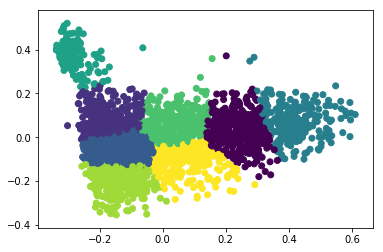

Done in 11.292441844940186 seconds


In [122]:
start = time.time()
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=8, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in", end - start, "seconds")

Pretty nice clusters, with the exception of the variance of the top right green blob.

### KMeans Mini-Batch

In [123]:
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)
true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)

In [124]:
from time import time

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_norm, y_train)
y_pred = rfc.predict(X_test_norm)

print('Training set score:', rfc.score(X_train_norm, y_train))
print('\nTest set score:', rfc.score(X_test_norm, y_test))
t0 = time()
print("Done in %0.3fs" % (time() - t0))

Training set score: 0.9945945945945946

Test set score: 0.5971922246220303
Done in 0.000s


In [125]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8072072072072072

Test set score: 0.6555075593952484
Done in 1.1374199390411377 seconds


### LSA with BoW

In [126]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8072072072072072

Test set score: 0.6555075593952484
Done in 1.3257319927215576 seconds


In [127]:
start = time.time()
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(bow)
terms = vectorizer.get_feature_names()
X_train_lsa = lsa.fit_transform(X_train)
X_test_lsa = lsa.transform(X_test)

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")
end = time.time()
print("Done in", end - start, "seconds")

Concept 0:
data
experience
work
team
development
ability
science
skills
years
software
 
Concept 1:
data
statistical
science
analysis
insights
models
big
mining
predictive
techniques
 
Concept 2:
ability
data
information
others
understand
required
problem
appropriate
job
time
 
Concept 3:
customer
product
years
management
software
technical
ability
experience
team
solutions
 
Concept 4:
utilize
care
residents
required
management
staff
resident
position
skills
clinical
 
Done in 52.71774625778198 seconds


In [128]:
fit = rfc.fit(X_train_lsa, y_train)
y_pred = rfc.predict(X_test_lsa)

print('Training set score:', rfc.score(X_train_lsa, y_train))
print('\nTest set score:', rfc.score(X_test_lsa, y_test))


Training set score: 0.9855855855855856

Test set score: 0.39740820734341253


### Bigrams

In [129]:
X_train_clean, X_test_clean= train_test_split(X, test_size=0.25, random_state=42)
count_vect_bigram = CountVectorizer(ngram_range=(1,2))
train_data_bow_bigram = count_vect_bigram.fit_transform(X_train_clean)
test_data_bow_bigram = count_vect_bigram.transform(X_test_clean)

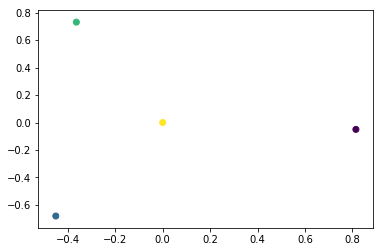

In [131]:
X_norm = normalize(train_data_bow_bigram)
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()

In [132]:
import time
start = time.time()

#Confusion matrix for Bigram BOW with Logistic Regression

lr = LogisticRegression()
lr.fit(train_data_bow_bigram,y_train)

print('Training set score:', lr.score(train_data_bow_bigram, y_train))
print('\nTest set score:', lr.score(test_data_bow_bigram, y_test))

y_pred = lr.predict(test_data_bow_bigram)

conf = confusion_matrix(y_test, y_pred, labels = X.job_class)

cm = pd.DataFrame(conf, index = [i for i in X.job_class],
                  columns = [i for i in X.job_class])
plt.figure(figsize = (15,7))
plt.title('Confusion Matrix for BoW with Bigrams')
sns.heatmap(cm, annot=True, cmap="PuBu", fmt = 'd')
crs = cross_val_score(lr, train_data_bow_bigram, y_train, cv=10)
print("Cross-Valid Bigram Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())
end = time.time()
print("Done in %0.3fs", end - start)

ValueError: Found input variables with inconsistent numbers of samples: [4, 2775]

## TF-IDF Analysis

### Train and Test Sets


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(bow)
tfidf.shape

In [ ]:
X_train_tfidf, X_test_tfidf = train_test_split(tfidf, test_size=0.25, random_state=42)

In [ ]:
import time

start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

In [ ]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)

print('Training set score:', lr.score(X_train_tfidf, y_train))
print('\nTest set score:', lr.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

In [ ]:
start = time.time()
# Normalize the data.
X_normt = normalize(tfidf)
# Reduce it to two components.
X_pcat = PCA(2).fit_transform(X_normt.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pcat)

# Plot the solution.
plt.scatter(X_pcat[:, 0], X_pcat[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in %0.3fs", end - start)

In [ ]:
start = time.time()
rfc = ensemble.RandomForestClassifier()

vectorizer1 = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the tweets
                             min_df=2, # only use words that appear at least 2x
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case 
                             use_idf=True,
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter tweets get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

X_train_tfidf = vectorizer1.fit_transform(X_train_clean)
X_test_tfidf = vectorizer1.transform(X_test_clean)

fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in %0.3fs", end - start)

In [ ]:
start = time.time()
X = df['Tweets']
X_norm_tfidf = normalize(vectorizer1.fit_transform(X))

true_k = 10
labels = y
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

print("Clustering sparse data with %s" % km)
km.fit(X_norm_tfidf)
mini_labels = km.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_norm_tfidf, km.labels_, sample_size=5000))
end = time.time()
print("Done in %0.3fs", end - start)

In [ ]:
df['MiniBatchLabels'] = mini_labels

In [ ]:
for label in set(mini_labels):
    print('Cluster: %d' % label)
    print(df[df.MiniBatchLabels == label].groupby('Org').count())
    print('')

In [ ]:
#Let's check Cluster 0 - the largest, and likely a catch-all for tweets that did not fall into other clusters
shuffle(df[df.MiniBatchLabels == 0]).head(10)

In [ ]:
#Let's check Cluster 1
shuffle(df[df.MiniBatchLabels == 1]).head(10)

In [ ]:
#Cluster 2
shuffle(df[df.MiniBatchLabels == 2]).head(10)

### LSA with TF-IDF

In [ ]:
print("Number of features: %d" % X_train_tfidf.get_shape()[1])

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space to about 10% of the original.
svd= TruncatedSVD(2100)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of tweets our solution considers similar, for the first five identified topics
tweets_by_component=pd.DataFrame(X_train_lsa, index=list(X_train))
for i in range(5):
    print('Component {}:'.format(i))
    print(tweets_by_component.loc[:,i].sort_values(ascending=False)[0:10])
import time
print(time.time())

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(tfidf)
terms = vectorizer.get_feature_names()

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")

In [ ]:
#Try a GBM classifier here, using TF-IDF 

clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train_tfidf, y_train)
tfidf_pred = clf.predict(X_test_tfidf.toarray())

print('Training set score:', clf.score(X_train_tfidf.toarray(), y_train))
print('\nTest set score:', clf.score(X_test_tfidf.toarray(), y_test))

In [ ]:
#Confusion matrix for GBM performance visualization on TF-IDF

conf = confusion_matrix(y_test, tfidf_pred, labels = handles)

df_cm = pd.DataFrame(conf, index = [i for i in handles],
                  columns = [i for i in handles])
plt.figure(figsize = (15,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

In [ ]:
X_train_tfidf.shape

In [ ]:
#LSA with Tf-idf
mlp = neural_network.MLPClassifier(hidden_layer_sizes = (100,), activation = 'logistic')
train = mlp.fit(X_train_lsa, y_train)
mlp_y_pred = mlp.predict(X_test_lsa)

print('Training set score:', mlp.score(X_train_lsa, y_train))
print('\nTest set score:', mlp.score(X_test_lsa, y_test))